The dataset I choose to work with throughout this Notebook is the bankruptcy prediction of a company dataset, The data were collected from the Taiwan Economic Journal from the years 1999 to 2009. The Company bankrupcy status was defined based on the business regulations of the Taiwan Stock Exchange at the time. 

Our aim working on this dataset is to use parameters(features) from the stock exchange market to predict, or specificaly classify, if a company will be bankrupt or not.

We start by load the necessary libraries.

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
# Configuring plotting visual and sizes
sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

We set the path for our dataset and we load it.

In [6]:
path = r"C:\Users\imade\Desktop\AE2\Principles of Machine learning\Datasets\data.csv"

In [7]:
bank_train = pd.read_csv(path)

We display the dataset

In [103]:
bank_train

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


### Data exploration

This phase is vital as it will make our job easier all throughout the notebook.

We start off checking the type of data present in our dataset

In [18]:
bank_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

As we can see our dataset contains mainly numeric attributes, this is good news since no data type conversation will be necessary. Potentially we can modify the target value “Bankrupt?” into categorical datatype but I rather keep it numerical to make it easier to compute when fitting the data with our model. I did try to modify the target value for both Boolean and categorical but it either wield poor results or it is not supported by the algorithm. 

In [ ]:
#this cells shows the  attempt to modify the type of target column before training the model
bank_train['Bankrupt?'] = bank_train['Bankrupt?'].astype('category')
bank_train['Bankrupt?'] = bank_train['Bankrupt?'].astype('boolean')

We do have quite a lot of predictor columns, in order to reduce them by finding the most relevant features I will perform a correlation analysis  

As we have quite a lot of features it will be easier to visualize the coorelation between them in the form of table.

In [8]:
c = bank_train.corr()
c

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Bankrupt?,1.000000,-0.260807,-0.282941,-0.273051,-0.100043,-0.099445,-0.000230,-0.008517,-0.008857,-0.016593,...,-0.315457,0.035104,-0.005547,-0.100044,-0.180987,0.166812,0.010508,-0.005509,NaN,-0.083048
ROA(C) before interest and depreciation before interest,-0.260807,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,...,0.887670,-0.071725,0.008135,0.334721,0.274287,-0.143629,-0.016575,0.010573,NaN,0.052416
ROA(A) before interest and % after tax,-0.282941,0.940124,1.000000,0.955741,0.326969,0.324956,0.032053,0.053518,0.049474,0.029649,...,0.961552,-0.098900,0.011463,0.326971,0.291744,-0.141039,-0.011515,0.013372,NaN,0.057887
ROA(B) before interest and depreciation after tax,-0.273051,0.986849,0.955741,1.000000,0.333749,0.331755,0.035212,0.053726,0.049952,0.022366,...,0.912040,-0.089088,0.007523,0.333750,0.280617,-0.142838,-0.014663,0.011473,NaN,0.056430
Operating Gross Margin,-0.100043,0.334719,0.326969,0.333749,1.000000,0.999518,0.005745,0.032493,0.027175,0.051438,...,0.300143,0.022672,0.004205,1.000000,0.075304,-0.085434,-0.011806,-0.001167,NaN,0.120029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Liability to Equity,0.166812,-0.143629,-0.141039,-0.142838,-0.085434,-0.085407,0.001541,-0.004043,-0.004390,-0.011899,...,-0.159697,0.021982,-0.003724,-0.085434,-0.791836,1.000000,0.002119,0.001487,NaN,-0.159654
Degree of Financial Leverage (DFL),0.010508,-0.016575,-0.011515,-0.014663,-0.011806,-0.011268,0.000935,0.000855,0.000927,-0.000556,...,-0.010463,-0.001881,-0.008812,-0.011806,-0.000093,0.002119,1.000000,0.016513,NaN,-0.016739
Interest Coverage Ratio (Interest expense to EBIT),-0.005509,0.010573,0.013372,0.011473,-0.001167,-0.001158,0.000393,0.000984,0.000957,0.001024,...,0.012746,0.000239,0.001027,-0.001169,0.005147,0.001487,0.016513,1.000000,NaN,-0.008339
Net Income Flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


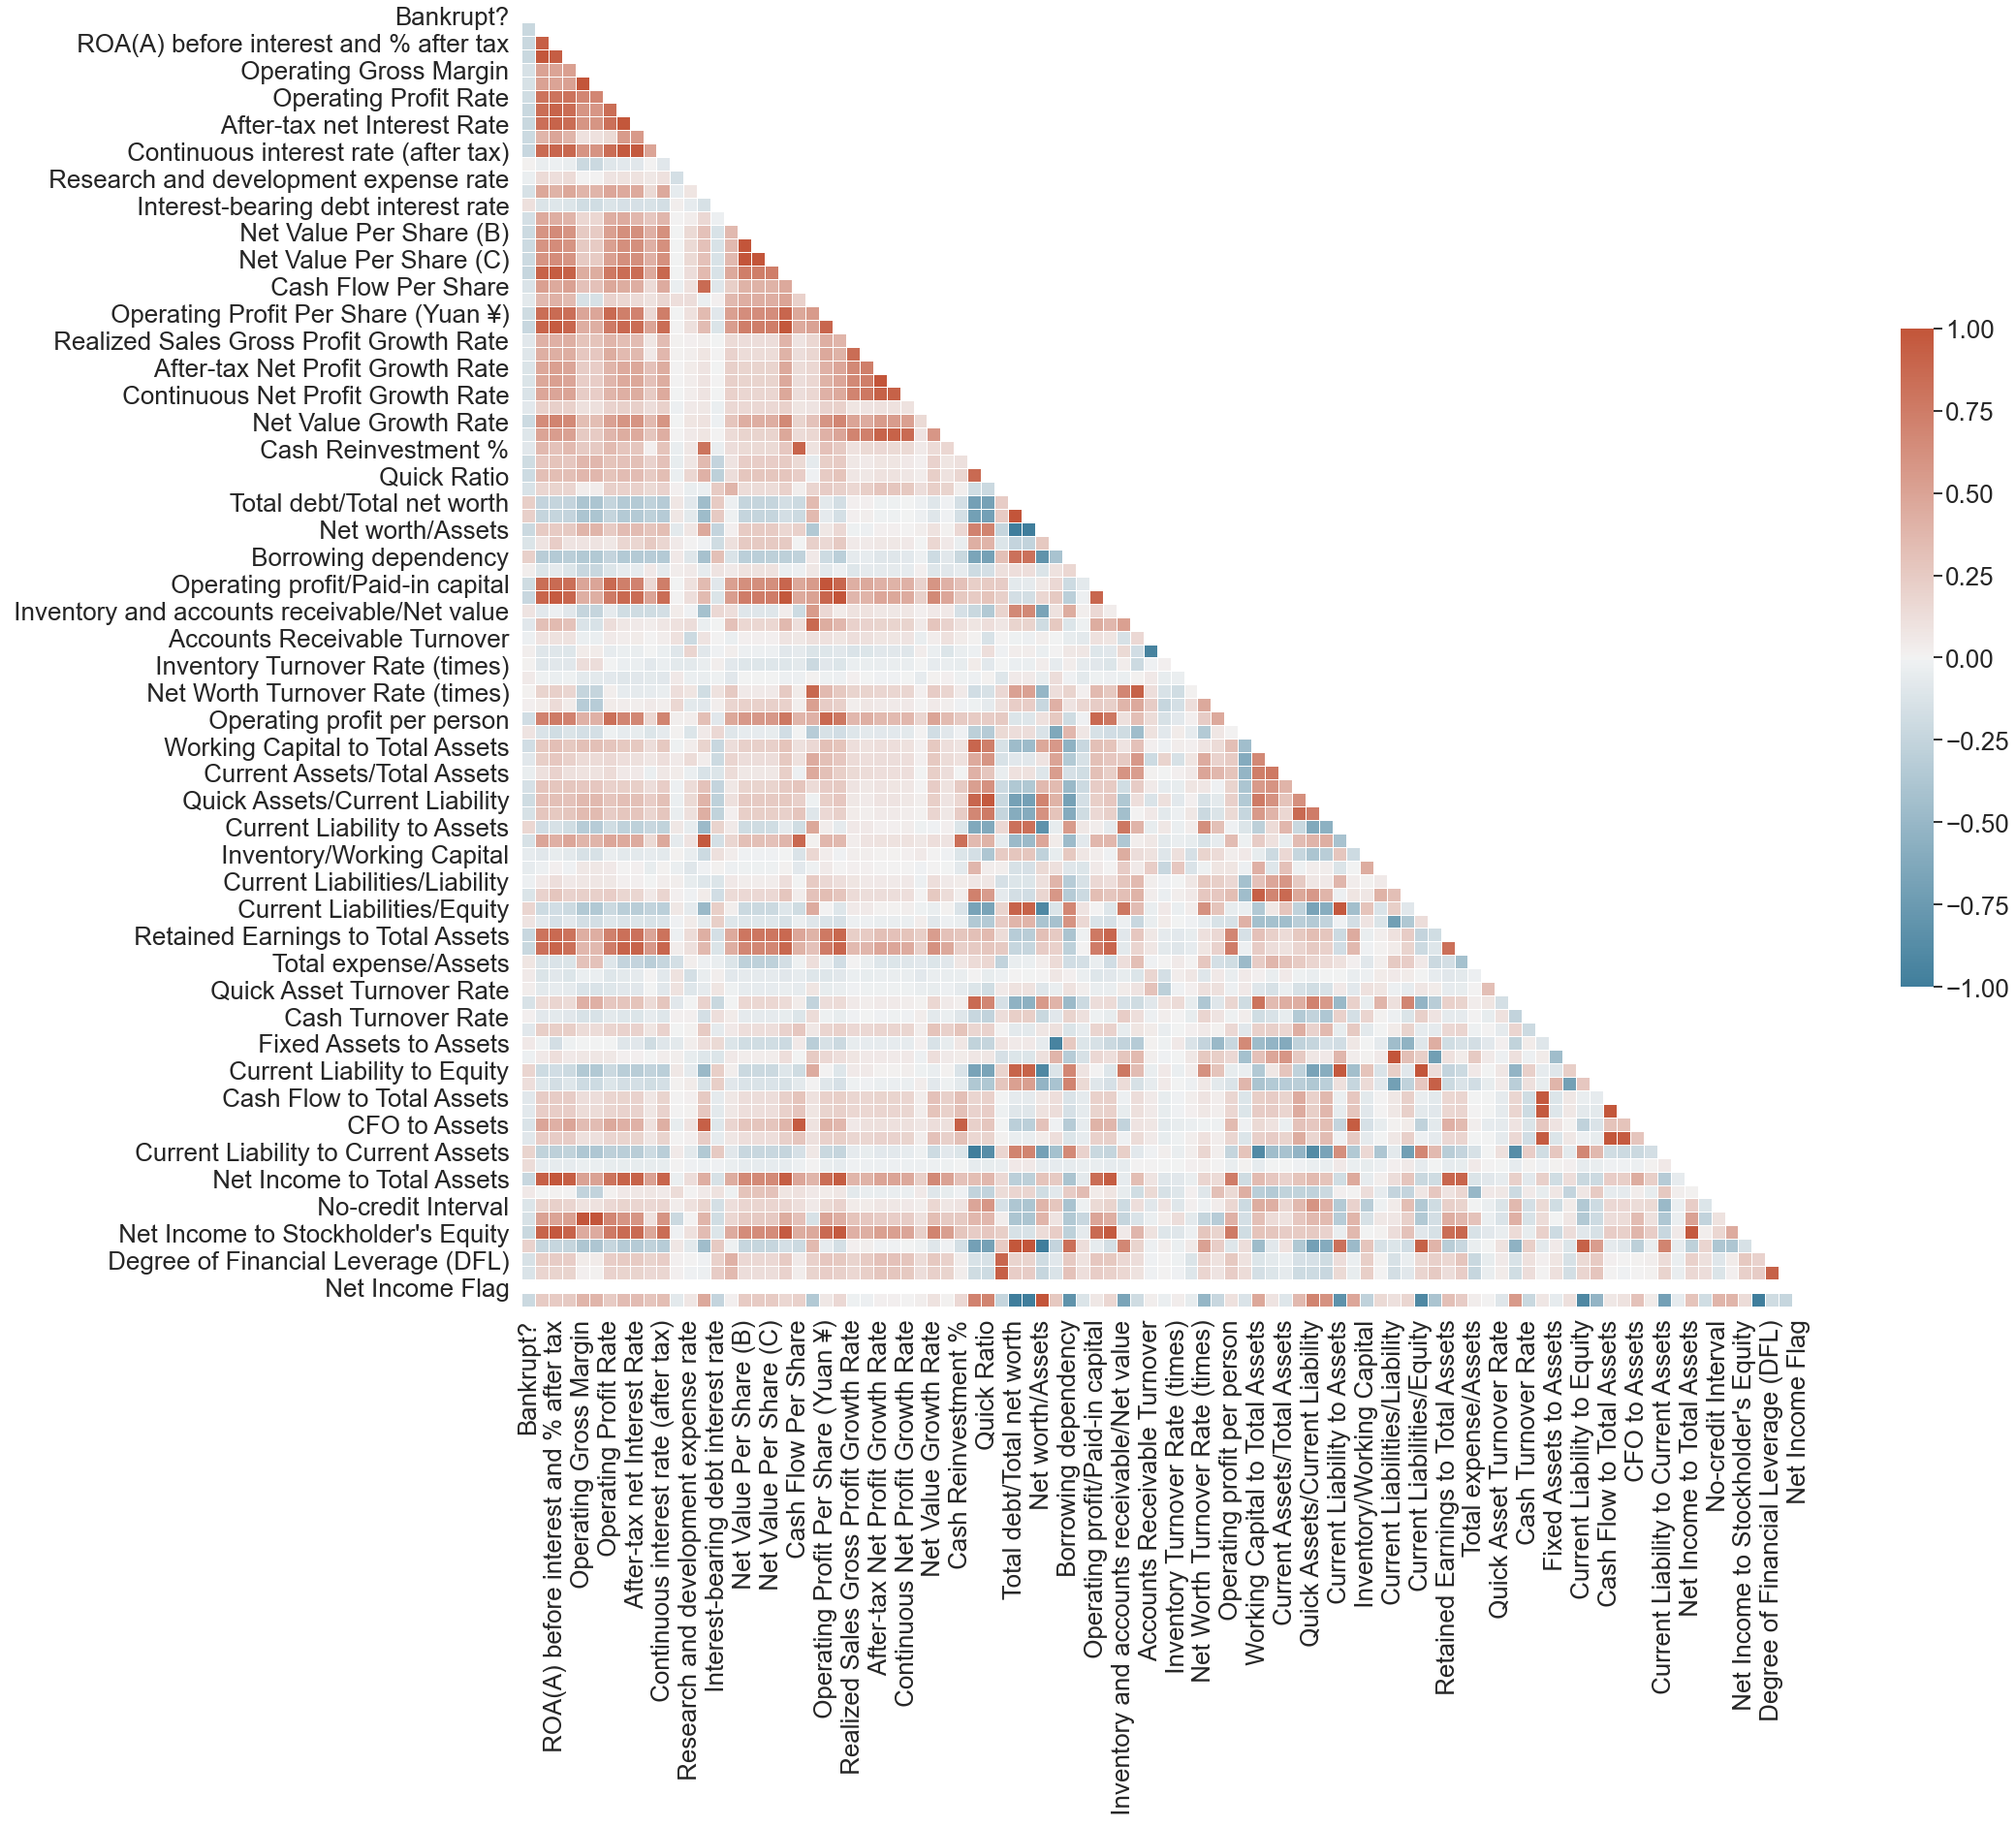

In [8]:
# Correlation Heatmap (Spearman)

f, ax = plt.subplots(figsize=(30, 25))
mat = bank_train.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,# annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

We can see that we mostly have weak correlations between the target value(Bankrupt?) and predictor features.

We will use the coorelation matrix to select the most relevant features that will be then used to create a most relevent features list.

the condition to select the most relevent features is to select the feature that have a correlation greater than 0

In [9]:
index = c.index
condition = c["Bankrupt?"] > 0
rel = index[condition]


list_features = rel.tolist()
len(list_features)

30

We now have reduced the number of features to 30, we apply that list to filter out our dataset

In [11]:
x = pd.DataFrame()
for f in list_features:
    x[f] = bank_train[f]

In [71]:
x

,Net Value Growth Rate,Quick Ratio,Total debt/Total net worth,Debt ratio %,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Inventory and accounts receivable/Net value,Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),...,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Equity,Equity to Long-term Liability,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,Liability to Equity,Degree of Financial Leverage (DFL),Borrowing dependency
0,0.000327,0.001208,0.021266,0.207576,0.005024,0.390284,0.006479,0.398036,1.165007e-04,0.032903,...,0.671568,0.424206,0.339077,0.126549,0.118250,0,0.009219,0.290202,0.026601,0.424389
1,0.000443,0.004039,0.012502,0.171176,0.005059,0.376760,0.005835,0.397725,7.190000e+08,0.025484,...,0.671570,0.468828,0.329740,0.120916,0.047775,0,0.008323,0.283846,0.264577,0.538214
2,0.000396,0.005348,0.021248,0.207516,0.005100,0.379093,0.006562,0.406580,2.650000e+09,0.013387,...,0.671571,0.276179,0.334777,0.117922,0.025346,0,0.040003,0.290189,0.026555,0.499019
3,0.000382,0.002896,0.009572,0.151465,0.005047,0.379743,0.005366,0.397925,9.150000e+09,0.028065,...,0.671519,0.559144,0.331509,0.120760,0.067250,0,0.003252,0.281721,0.026697,0.451265
4,0.000439,0.003727,0.005150,0.106509,0.005303,0.375025,0.006624,0.400079,2.935211e-04,0.040161,...,0.671563,0.309555,0.330726,0.110933,0.047725,0,0.003878,0.278514,0.024752,0.538432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.000450,0.005457,0.006655,0.124618,0.005150,0.373823,0.005366,0.404804,1.429781e-04,0.027903,...,0.671570,0.400338,0.330914,0.112622,0.027951,0,0.000466,0.279606,0.027064,0.539468
6815,0.000445,0.006741,0.004623,0.099253,0.006772,0.372505,0.008619,0.399926,6.051982e-04,0.027419,...,0.671572,0.096136,0.329753,0.112329,0.031470,0,0.001959,0.278132,0.027009,0.538269
6816,0.000435,0.035112,0.001392,0.038939,0.009149,0.369637,0.005366,0.395592,1.024298e-03,0.022419,...,0.671564,0.055509,0.326921,0.110933,0.007542,0,0.002840,0.275789,0.026791,0.533744
6817,0.000529,0.007256,0.003816,0.086979,0.005529,0.369649,0.007068,0.401540,2.330013e-04,0.027258,...,0.671606,0.246805,0.329294,0.110957,0.022916,0,0.002837,0.277547,0.026822,0.559911


I selected the best feature now we extract the target value.

In [12]:
y = x.iloc[:,:1]
del x['Bankrupt?']

In [70]:
x['Borrowing dependency'] = bank_train.iloc[:,2:3]

the next logical step is to take a look at our predictor value.

In [13]:
x

,Net Value Growth Rate,Quick Ratio,Total debt/Total net worth,Debt ratio %,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Inventory and accounts receivable/Net value,Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),...,Quick Asset Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Equity,Equity to Long-term Liability,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,Liability to Equity,Degree of Financial Leverage (DFL)
0,0.000327,0.001208,0.021266,0.207576,0.005024,0.390284,0.006479,0.398036,1.165007e-04,0.032903,...,6.550000e+09,0.671568,0.424206,0.339077,0.126549,0.118250,0,0.009219,0.290202,0.026601
1,0.000443,0.004039,0.012502,0.171176,0.005059,0.376760,0.005835,0.397725,7.190000e+08,0.025484,...,7.700000e+09,0.671570,0.468828,0.329740,0.120916,0.047775,0,0.008323,0.283846,0.264577
2,0.000396,0.005348,0.021248,0.207516,0.005100,0.379093,0.006562,0.406580,2.650000e+09,0.013387,...,1.022676e-03,0.671571,0.276179,0.334777,0.117922,0.025346,0,0.040003,0.290189,0.026555
3,0.000382,0.002896,0.009572,0.151465,0.005047,0.379743,0.005366,0.397925,9.150000e+09,0.028065,...,6.050000e+09,0.671519,0.559144,0.331509,0.120760,0.067250,0,0.003252,0.281721,0.026697
4,0.000439,0.003727,0.005150,0.106509,0.005303,0.375025,0.006624,0.400079,2.935211e-04,0.040161,...,5.050000e+09,0.671563,0.309555,0.330726,0.110933,0.047725,0,0.003878,0.278514,0.024752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.000450,0.005457,0.006655,0.124618,0.005150,0.373823,0.005366,0.404804,1.429781e-04,0.027903,...,1.244230e-04,0.671570,0.400338,0.330914,0.112622,0.027951,0,0.000466,0.279606,0.027064
6815,0.000445,0.006741,0.004623,0.099253,0.006772,0.372505,0.008619,0.399926,6.051982e-04,0.027419,...,1.173396e-04,0.671572,0.096136,0.329753,0.112329,0.031470,0,0.001959,0.278132,0.027009
6816,0.000435,0.035112,0.001392,0.038939,0.009149,0.369637,0.005366,0.395592,1.024298e-03,0.022419,...,1.749713e-04,0.671564,0.055509,0.326921,0.110933,0.007542,0,0.002840,0.275789,0.026791
6817,0.000529,0.007256,0.003816,0.086979,0.005529,0.369649,0.007068,0.401540,2.330013e-04,0.027258,...,1.351937e-04,0.671606,0.246805,0.329294,0.110957,0.022916,0,0.002837,0.277547,0.026822


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bankrupt?', ylabel='count'>

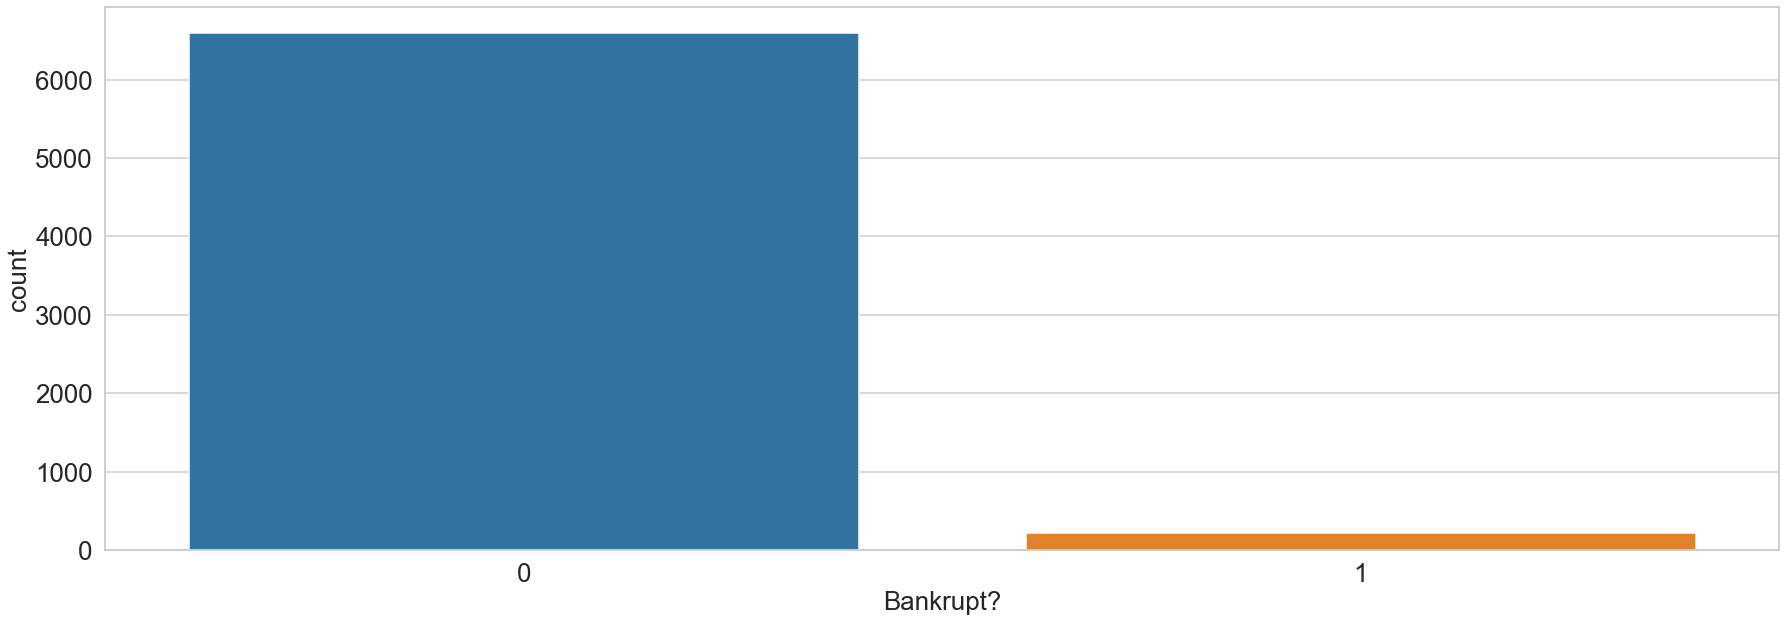

In [14]:
sns.countplot('Bankrupt?',data=bank_train)

This is bad news, this dataset is extremely unbalanced, and decision tree is known to not perform well under those condition, there is 2 ways to deal with an unbalanced dataset, the first one is  undersampling , in other words, what it does is it reduce the number of features, but this dataset is way too unbalanced for that, we risk having too few features and the model will lose its capacity to generalize, I will then perform an oversampling. Which is increasing the number of features so they both will match. 

For this task we need to install an external library.

In [20]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


It works similarly to how we train a normal model. 

In [75]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=4)
ros.fit(x, y)
x_resampled,y_resampled = ros.fit_resample(x,y)

let's check now the result of our oversampling

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bankrupt?', ylabel='count'>

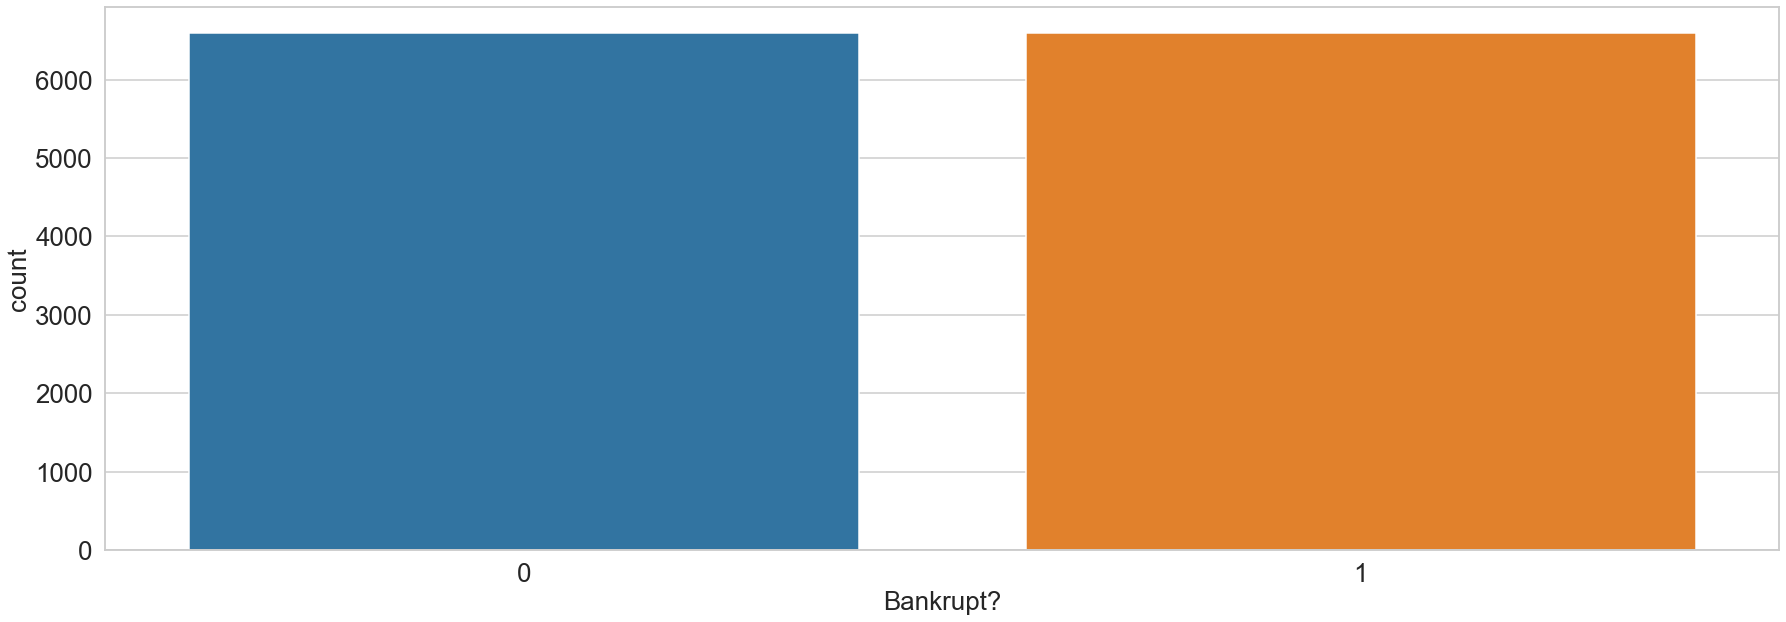

In [23]:
sns.countplot('Bankrupt?',data=y_resampled)


Now we have a way more balanced dataset.

Most of the data preprocessing is done (the data is cleaned and transformed when necessary, and we reduced the number of features to only those necessary, we also made x and y variables)

All there is to do now is to check for null values AND duplicate. 

In [12]:
# Checking any NaN value presence
bank_train.isna().sum().max()

0

In [13]:
# Checking for duplicates
bank_train.duplicated().sum()

0

The data has already been pretty much cleaned up. 

We split the data into training and validation set with a 80/20 ratio

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_resampled,y_resampled,test_size=.2, random_state=2)

In [19]:
from sklearn.preprocessing import StandardScaler
# Feature scaling (standardized)
#preprocessing.StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

We can now train our classifier

In [67]:
#we load the library
from sklearn.tree import DecisionTreeClassifier

In [68]:
#we train the classifier with the default parameters 
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

We classify the values present in the validation set.

In [20]:
y_predicted = clf.predict(x_test)

In [21]:
y_predicted

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

We visualize our tree. 

[Text(0.45836665174002045, 0.9821428571428571, 'X[5] <= -0.09\ngini = 0.5\nsamples = 10558\nvalue = [5254, 5304]'),
 Text(0.20803480040941658, 0.9464285714285714, 'X[28] <= -0.083\ngini = 0.336\nsamples = 5460\nvalue = [4294, 1166]'),
 Text(0.12487205731832139, 0.9107142857142857, 'X[17] <= 0.644\ngini = 0.49\nsamples = 1597\nvalue = [688, 909]'),
 Text(0.06960081883316274, 0.875, 'X[5] <= -0.157\ngini = 0.478\nsamples = 1030\nvalue = [622, 408]'),
 Text(0.04912998976458546, 0.8392857142857143, 'X[7] <= -0.359\ngini = 0.208\nsamples = 440\nvalue = [388, 52]'),
 Text(0.04094165813715456, 0.8035714285714286, 'X[20] <= -0.065\ngini = 0.037\nsamples = 53\nvalue = [1, 52]'),
 Text(0.032753326509723645, 0.7678571428571429, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.04912998976458546, 0.7678571428571429, 'gini = 0.0\nsamples = 52\nvalue = [0, 52]'),
 Text(0.057318321392016376, 0.8035714285714286, 'gini = 0.0\nsamples = 387\nvalue = [387, 0]'),
 Text(0.09007164790174002, 0.83928571428

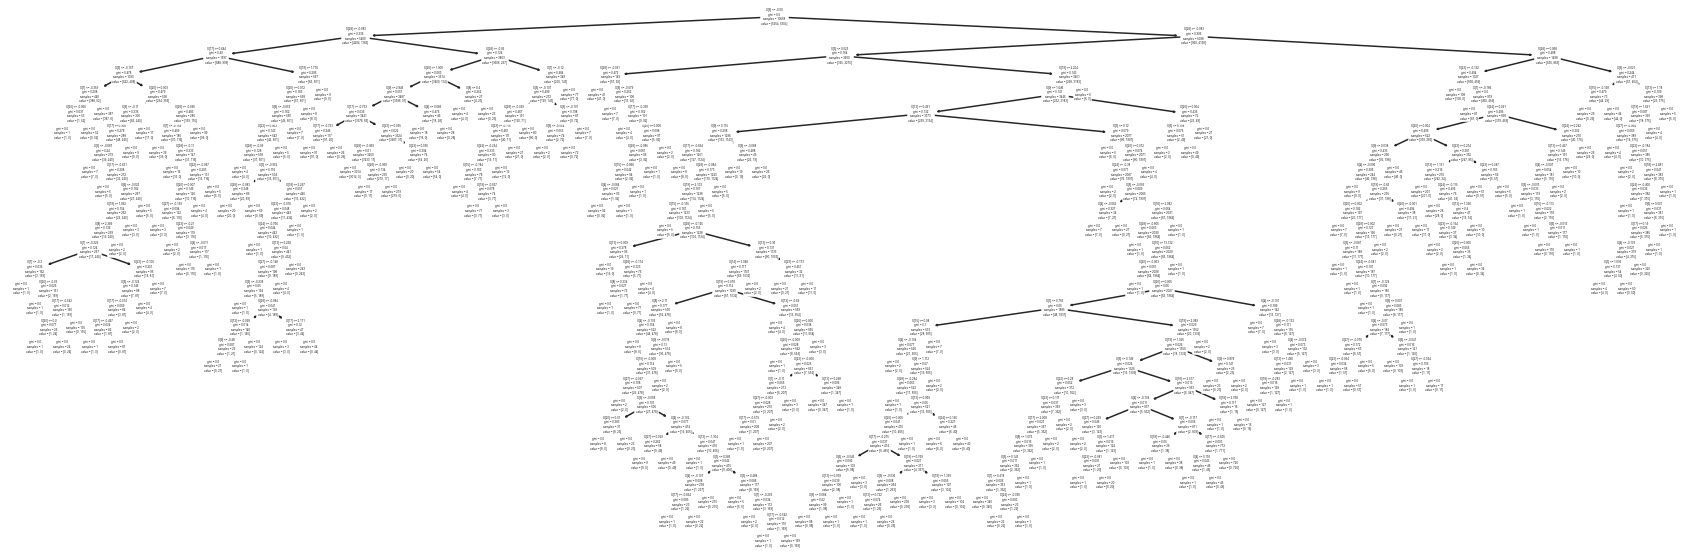

In [23]:
from sklearn import tree
tree.plot_tree(clf)

In [19]:
scoretrain = clf.score(x_train,y_train)
scoretest  = clf.score(x_test,y_test)
print("training score :{:2f} , Test Score: {:2f} \n".format(scoretrain,scoretest))

training score :1.000000 , Test Score: 0.982955 



Truly supprinsing result, we got an almost perfect score on our validation set, does this mean our data processing pipeline was well done ? There is no real way to really assess manually, I do suspect the result is due to our process of oversmapling the data, I will train the data without sampling it to check the assumption. 

In [31]:
x_train,x_test,y_train,y_test = train_test_split(bank_train.iloc[:,1:],bank_train.iloc[:,:1],test_size=.2, random_state=2)
# Feature scaling (standardized)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
#model training

clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
#Accuracy check
scoretrain = clf.score(x_train,y_train)
scoretest  = clf.score(x_test,y_test)
print("training score :{:2f} , Test Score: {:2f} \n".format(scoretrain,scoretest))

training score :1.000000 , Test Score: 0.950147 



As expected, this is a more realistic result, but still there is no real way to assess the true accuracy of the model due to nature of the labels and their repartition, we have a bi-label dataset with an overwhelming repartition of one of the labels, we therefor need more true balanced data without having to resort to algorithmic sampling. Or perhaps our data pipeline was indeed efficient. 

In [50]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [17]:
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

In [13]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("test") 

'test.pdf'

In [45]:
dot_data = tree.export_graphviz(clf) 

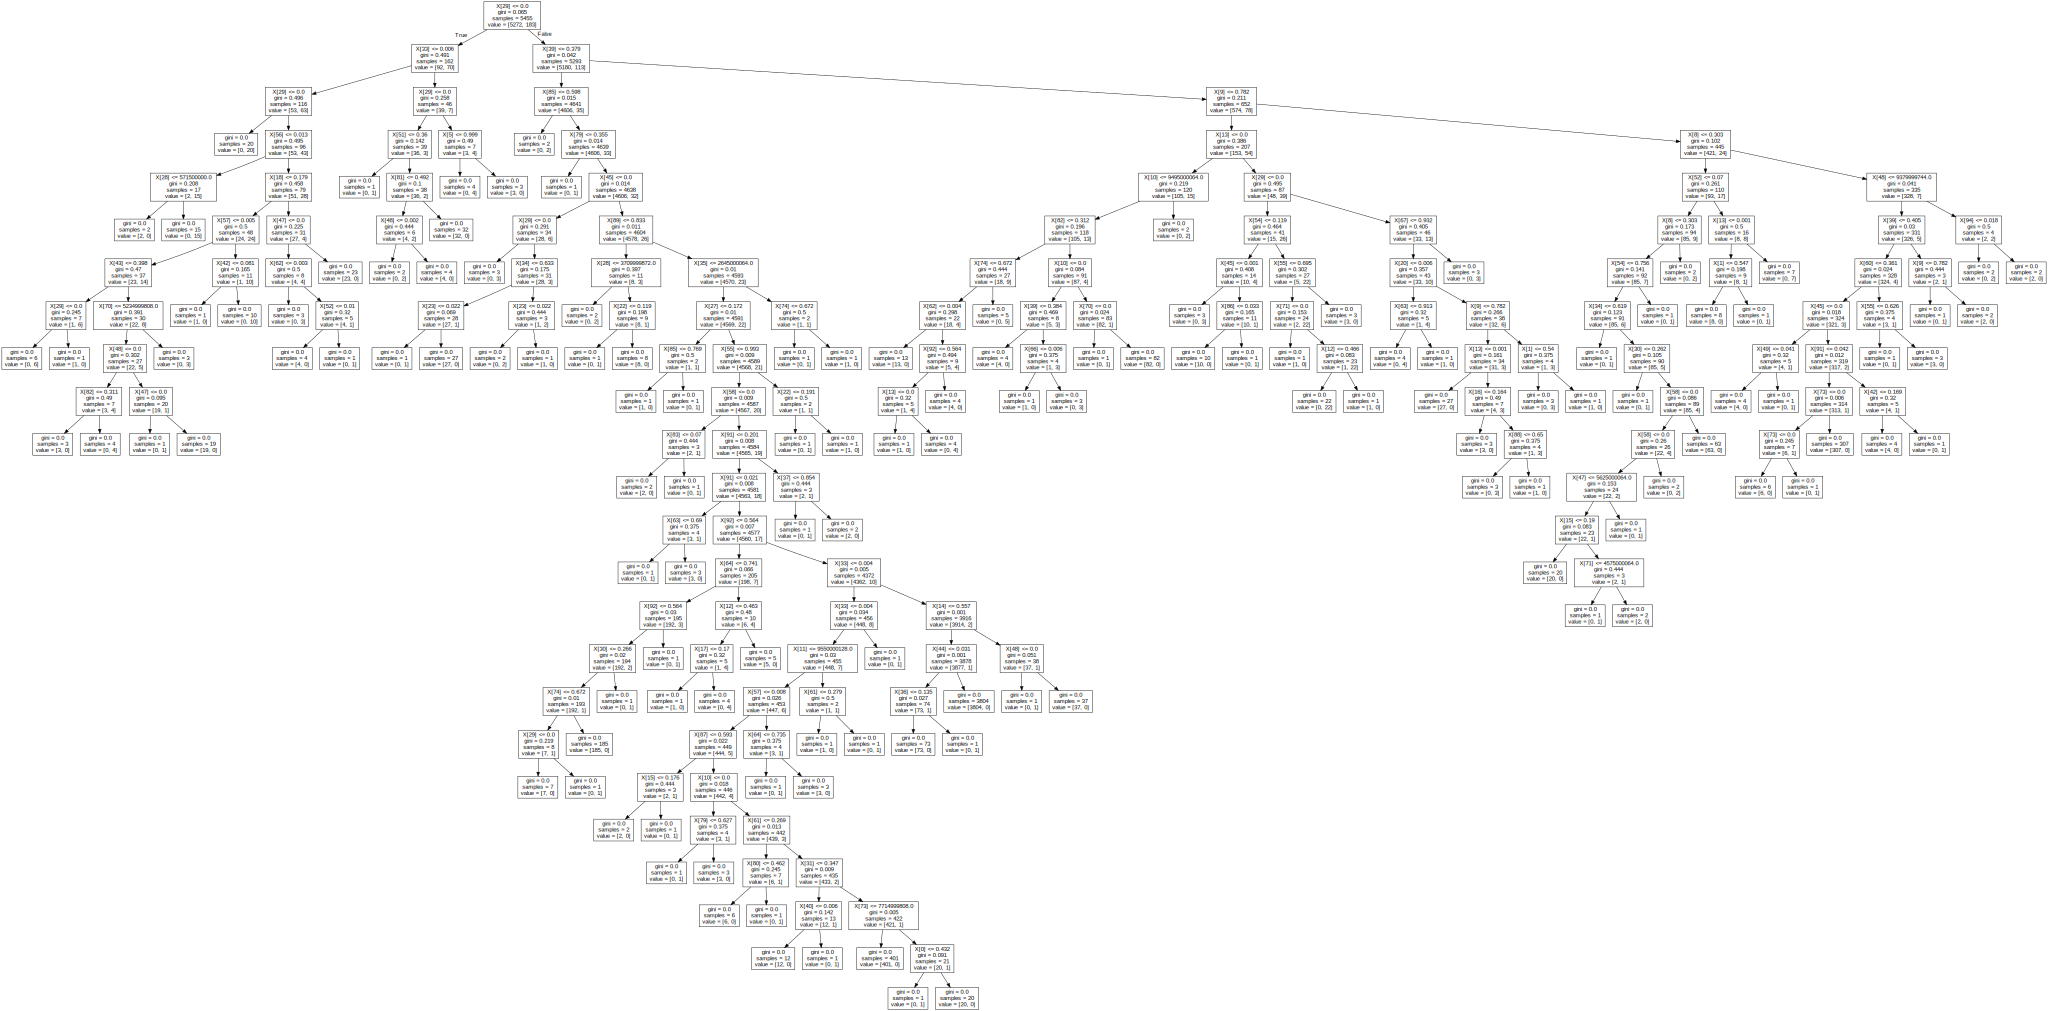

In [46]:
graph = graphviz.Source(dot_data)  
graph 

We first check the current depth of our classifier.

In [73]:
clf.get_depth()

27

We will now preform a cross validation to select the best depth for our classifier

In [75]:
from sklearn.model_selection import cross_val_score
# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores


In [77]:
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(x_train, y_train, sm_tree_depths)
print(f'The cross validation score is {sm_cv_scores_mean} the accuracy score is {sm_accuracy_scores}')
for i in enumerate()

The cross validation score is [0.79191133 0.81672817 0.85196015 0.87734401 0.90272679 0.92242851
 0.93957212 0.95055975 0.95718921 0.96325094 0.96571351 0.96997608
 0.97158624 0.97310189 0.97442801 0.9761326  0.97774258 0.97840573
 0.97916353 0.97973153 0.98048928 0.98020515 0.98115225 0.98096295] the accuracy score is [0.79863611 0.8195681  0.85016102 0.87156658 0.8996022  0.91968176
 0.94373934 0.96220875 0.96751279 0.97347983 0.97878386 0.97982572
 0.98200417 0.9854139  0.98617162 0.98835007 0.99090737 0.99242281
 0.99327524 0.99441182 0.99488539 0.99677969 0.99791627 0.99848456]


In [83]:
max_value = 0
for i in range(0, len(sm_cv_scores_mean)):
    if max_value < sm_cv_scores_mean[i]:
        max_value = sm_cv_scores_mean[i]
        max_index = i + 1
        
print(f' the depth for our decision with the highest cross validation score is  {max_index}')

 the depth for our decision with the highest cross validation score is  23


In [82]:
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

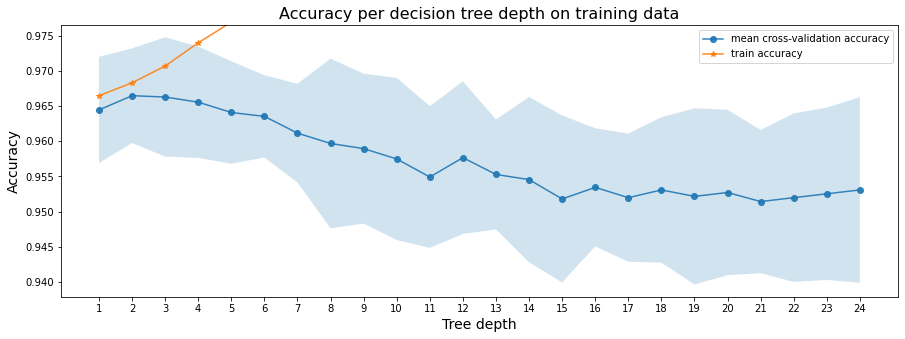

In [15]:
# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(x_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')


As discussed the decision tree classifier default algorithm available in scikit learn is an implementation of the CART algorithm to optimize the shape  

The decision tree model algorithm is a non-parametric method because there no underlying distributional assumptions about the distribution of the errors or the data, that essentially means that the model is constructed on the observed data.

One clear example of a parametric model would be Gaussian Maximum Likelihood Classification, It is parametric because it considers the data stream as a multivariate gaussian distribution where classes are characterized by means and covariances.

Even if you use a parametric model such as a Gaussian distribution to select the potential branches for a decision tree classifier, it will still be a non-parametric model, because the decision surface generated by the tree will no correspond to the Gaussian distribution.


To do this task we need to first generate unseen data to that matches the data we already have

we will do this using the SDV library short for Synthetic Data Vault which generete synthetic data. 

In [27]:
pip  install sdv --user

  Using cached sdv-0.15.0-py2.py3-none-any.whl (102 kB)
  Using cached copulas-0.7.0-py2.py3-none-any.whl (53 kB)
  Using cached deepecho-0.3.0.post1-py2.py3-none-any.whl (26 kB)
  Using cached Faker-9.9.1-py3-none-any.whl (1.2 MB)
  Using cached rdt-0.6.4-py2.py3-none-any.whl (45 kB)
  Using cached sdmetrics-0.5.0-py2.py3-none-any.whl (98 kB)
  Using cached ctgan-0.5.1-py2.py3-none-any.whl (24 kB)
  Using cached matplotlib-3.5.2-cp38-cp38-win_amd64.whl (7.2 MB)
  Using cached torch-1.12.0-cp38-cp38-win_amd64.whl (161.9 MB)
  Using cached torchvision-0.13.0-cp38-cp38-win_amd64.whl (1.1 MB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
  Using cached fonttools-4.34.4-py3-none-any.whl (944 kB)
  Using cached pyts-0.12.0-py3-none-any.whl (2.5 MB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


We will use the x_train data to generate synthetic one, because it already cleaned and pre-processed data.

In [52]:
from sdv.tabular import GaussianCopula
model = GaussianCopula()
model.fit(x_train)

C:\Users\imade\AppData\Roaming\Python\Python38\site-packages\copulas\univariate\truncated_gaussian.py:45: RuntimeWarning: divide by zero encountered in double_scalars
  a = (self.min - loc) / scale
C:\Users\imade\AppData\Roaming\Python\Python38\site-packages\copulas\univariate\truncated_gaussian.py:46: RuntimeWarning: divide by zero encountered in double_scalars
  b = (self.max - loc) / scale
C:\Users\imade\AppData\Roaming\Python\Python38\site-packages\copulas\univariate\truncated_gaussian.py:45: RuntimeWarning: invalid value encountered in double_scalars
  a = (self.min - loc) / scale


In [53]:
sample = model.sample(1000)
sample.head()

,Net Value Growth Rate,Quick Ratio,Total debt/Total net worth,Debt ratio %,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Inventory and accounts receivable/Net value,Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),...,Quick Asset Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Equity,Equity to Long-term Liability,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,Liability to Equity,Degree of Financial Leverage (DFL)
0,1.224951e+08,2.078224e+08,2.551336e+08,0.142711,0.002404,0.417687,0.028480,0.415196,2.478620e+09,0.041576,...,1.834115e+09,0.657187,4.468625e+08,0.356085,0.225221,0.030601,0,4.057339e+08,0.315115,0.010104
1,4.105191e+08,3.663993e+07,5.982339e+07,0.127292,0.045640,0.399671,0.068191,0.406330,1.267620e+09,0.089403,...,4.892690e+09,0.666487,6.239849e+07,0.360388,0.090089,0.075406,0,1.201423e+07,0.310890,0.028021
2,1.571655e+08,3.596316e+08,3.022512e+07,0.065072,0.046577,0.294024,0.013423,0.337847,6.820470e+09,0.017700,...,9.611885e+09,0.669284,3.971368e+07,0.240287,0.091036,0.063904,0,4.046293e+08,0.203312,0.035722
3,2.780713e+08,3.919825e+07,1.883712e+08,0.126673,0.040706,0.329858,0.078572,0.364536,9.393590e+08,0.072089,...,6.776294e+09,0.674715,1.492631e+08,0.306523,0.062122,0.076132,0,2.141042e+08,0.247044,0.011522
4,4.394239e+08,3.248953e+08,1.593027e+07,0.047513,0.002934,0.362205,0.056154,0.380224,4.376912e+09,0.006862,...,1.375146e+08,0.663441,4.117670e+07,0.321205,0.089877,0.004034,0,3.413260e+08,0.270335,0.014304


In [61]:
y_predicted = clf.predict(sample)

In [62]:
scoretest  = clf.score(sample,y_predicted)
print(f"Accuracy score on the unseen data: {scoretest} \n")

Accuracy score on the unseen data: 1.0 



This score is due to our previous oversampling, and generating data that is too similar, the model is clearly overfitting here.

In [84]:
from sklearn.ensemble import RandomForestClassifier
clf_forest = RandomForestClassifier(max_depth=2, random_state=0)
clf_forest.fit(x_train, y_train)

<ipython-input-84-0d0a6c8aa66b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_forest.fit(x_train, y_train)


RandomForestClassifier(max_depth=2, random_state=0)

In [85]:
scoretrain = clf.score(x_train,y_train)
scoretest  = clf.score(x_test,y_test)
print("Decision tree classifier --> training score :{:2f} , Test Score: {:2f} \n".format(scoretrain,scoretest))
scoretrain = clf_forest.score(x_train,y_train)
scoretest  = clf_forest.score(x_test,y_test)
print("Random forest classifier --> training score :{:2f} , Test Score: {:2f} \n".format(scoretrain,scoretest))

Decision tree classifier --> training score :1.000000 , Test Score: 0.984848 

Random forest classifier --> training score :0.828377 , Test Score: 0.831061 



Suprinsingly the random forest classifier gaves a less accuraty score overall compared to the decision tree classifier, and even more suprinsing is that we got a slightly higher score for the validation set for the random forest classifier.

Boosting in machine learning is a set of algorithm that that are applied to a model in order to reduce the training errors, by combining a set of weak learners into strong learners, more specifically, we select a random sample from our dataset, we fit it with a model and we train it is sequential manner, in other words,  we train each model iteratively to compensate for the weakness of its predecessor, and with each iteration we combine the weak rules from each individual classifier in order to form one final and more efficient prediction rule.

The boosting method is usually applied in the case of a classifier that is simple and stable but has a high tendency for biases, one clear example of that would be image classification using a simple image based classifiers,  we can use the boosting method for this type of classification to unify the weak classifiers in order to boost the overall accuracy of the categorization.

Gradient boosting method is one of the most popular method of boosting  methods, it is applied on both classification and regression tasks, it typically gives a prediction model in form of decision trees, specifically, it works by adding predictors to an ensemble sequentially, each predictor corrects the errors of its predecessor, contrary to other boosting methods such as adaptive boosting that changes weights of the data points, gradient boosting trains on the residual errors of the previous predictor, its is a combination of the gradient descent algorithm and the boosting method, thus the name.

Gradient boosting is generally used to improve a model's predictive accuracy, as for a specific condition it greatly helps resolving multiples problems that we call multicollinearity where there are high correlations between the predictor features.

the most efficient way to find the best parameter for our random forest is to pass it through the gridsearchCV function, how it works is you start by setting a parameter grid, it will contain the most relevant parameter with different weights and the function will run each one of them and compare it to all other, creating all possible combination, this process is the one of the most efficient way to find the best parameter for the common models, the drawback is that the computational cost can increase exponentially to more parameter and weights we add.

In [98]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

We run the grid search.

In [96]:
CV_rfc = GridSearchCV(estimator=clf_forest, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, np.ravel(y_train))

C:\Users\imade\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\imade\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\imade\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remo

C:\Users\imade\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\imade\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\imade\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remo

C:\Users\imade\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\imade\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\imade\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remo

C:\Users\imade\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\imade\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\imade\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remo

C:\Users\imade\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\imade\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\imade\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remo

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=2, random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

We runned a pretty computational heavy process, lets see what's the best parameter the function found. 

In [97]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

Let's apply those parameters and see if we have a more accurate model. 

In [100]:
from sklearn.ensemble import RandomForestClassifier
clf_forest = RandomForestClassifier(criterion = 'entropy',
  max_depth = 8,
  max_features = 'auto',
  n_estimators = 500)
clf_forest.fit(x_train, y_train)
scoretrain = clf_forest.score(x_train,y_train)
scoretest  = clf_forest.score(x_test,y_test)
print("Random forest classifier --> training score :{:2f} , Test Score: {:2f} \n".format(scoretrain,scoretest))

<ipython-input-100-4ed839bfb9c6>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_forest.fit(x_train, y_train)
C:\Users\imade\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random forest classifier --> training score :0.974522 , Test Score: 0.970455 




Astonishing increase in the accuracy results, this makes it a vital process if we care about having a functional model, despite the computational cost.


### Clustering

For this task I will apply the K-means clustering algorithm on 2 selected column from my dataset, first of all I need to visualize the distribution of those columns.

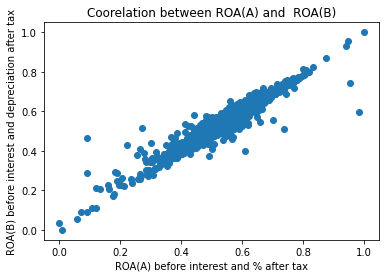

In [27]:
plt.scatter(bank_train.iloc[:,2],bank_train.iloc[:,3])
plt.xlabel("ROA(A) before interest and % after tax")
plt.ylabel("ROA(B) before interest and depreciation after tax")
plt.title("Coorelation between ROA(A) and  ROA(B)")
plt.show()

We do have a linear distribution/correlation between the 2 variables this will make our assessment of the efficiency of the algorithm easier

We will now process our dat for the clustering

In [13]:
c1 = bank_train.iloc[:,2]
c2 = bank_train.iloc[:,3]
dict_ = {"ROA":c1,"ROB":c2}
data = pd.DataFrame(dict_)


In [15]:
data

,ROA,ROB
0,0.424389,0.405750
1,0.538214,0.516730
2,0.499019,0.472295
3,0.451265,0.457733
4,0.538432,0.522298
...,...,...
6814,0.539468,0.543230
6815,0.538269,0.524172
6816,0.533744,0.520638
6817,0.559911,0.554045


In [115]:
pip install --user threadpoolctl==3.1.0

  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.0.0
    Uninstalling threadpoolctl-3.0.0:
      Successfully uninstalled threadpoolctl-3.0.0
Note: you may need to restart the kernel to use updated packages.


we will train the algorithm using the dataframe created, we set up the model using some random parameter. 

In [113]:
pip install --upgrade --user numpy

  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.4
    Uninstalling numpy-1.21.4:
      Successfully uninstalled numpy-1.21.4
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.6.2 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.23.1 which is incompatible.


In [16]:
from sklearn.cluster import KMeans
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

prediction = km.fit_predict(data)


In [36]:
temp = pd.DataFrame(prediction)

we now visualuse the result of your clustering

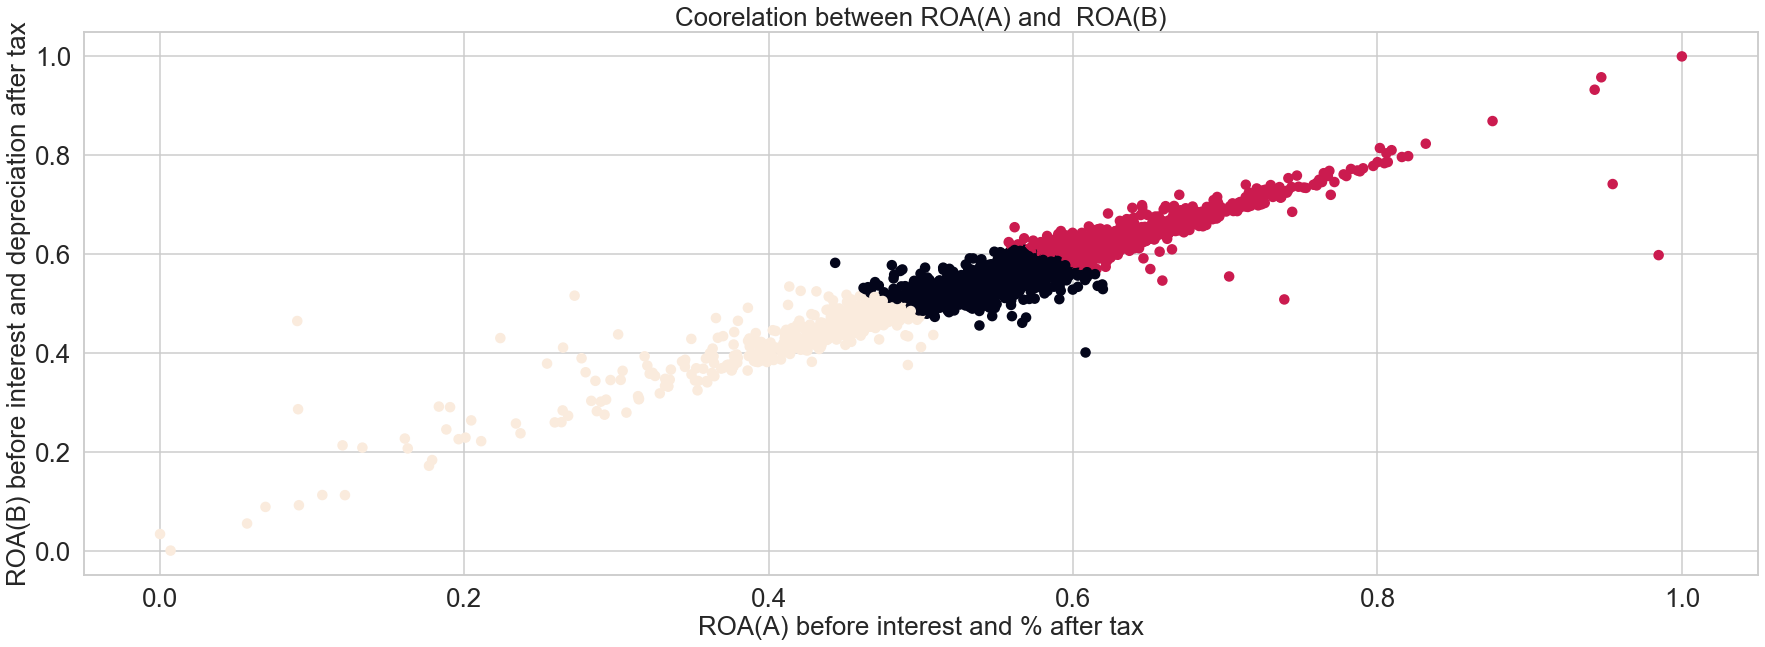

In [17]:
fig, ax = plt.subplots()
plt.scatter(bank_train.iloc[:,2],bank_train.iloc[:,3],c = prediction)
plt.xlabel("ROA(A) before interest and % after tax")
plt.ylabel("ROA(B) before interest and depreciation after tax")
plt.title("Coorelation between ROA(A) and  ROA(B)")
plt.show()

as we can see The algorithm have seperated the data into 3 distinct clusters, this is a satifactory result so far, but we are not limited to only 3 cluster lets try with different number of cluster and  visualize the changes. 

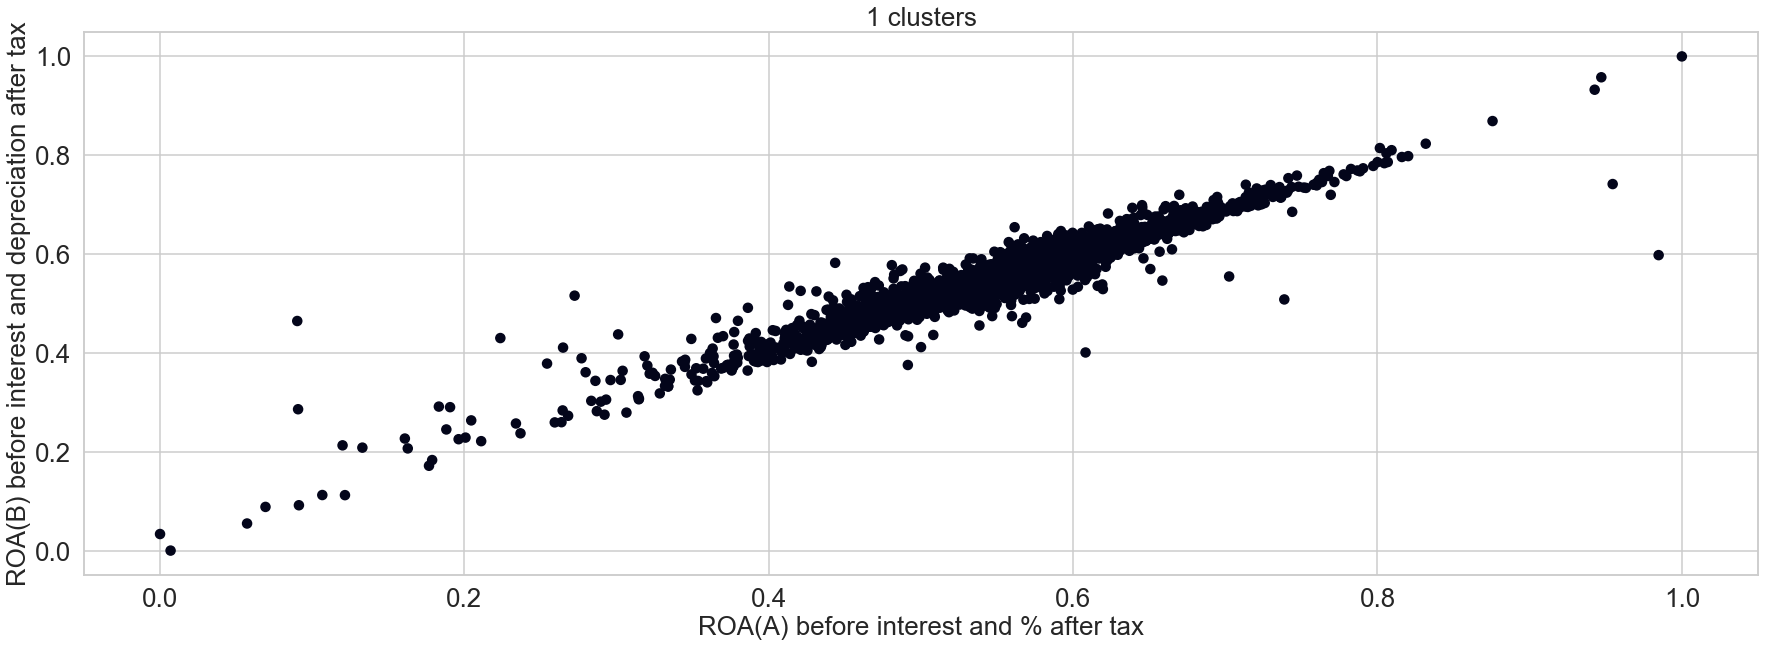

<Figure size 2160x720 with 0 Axes>

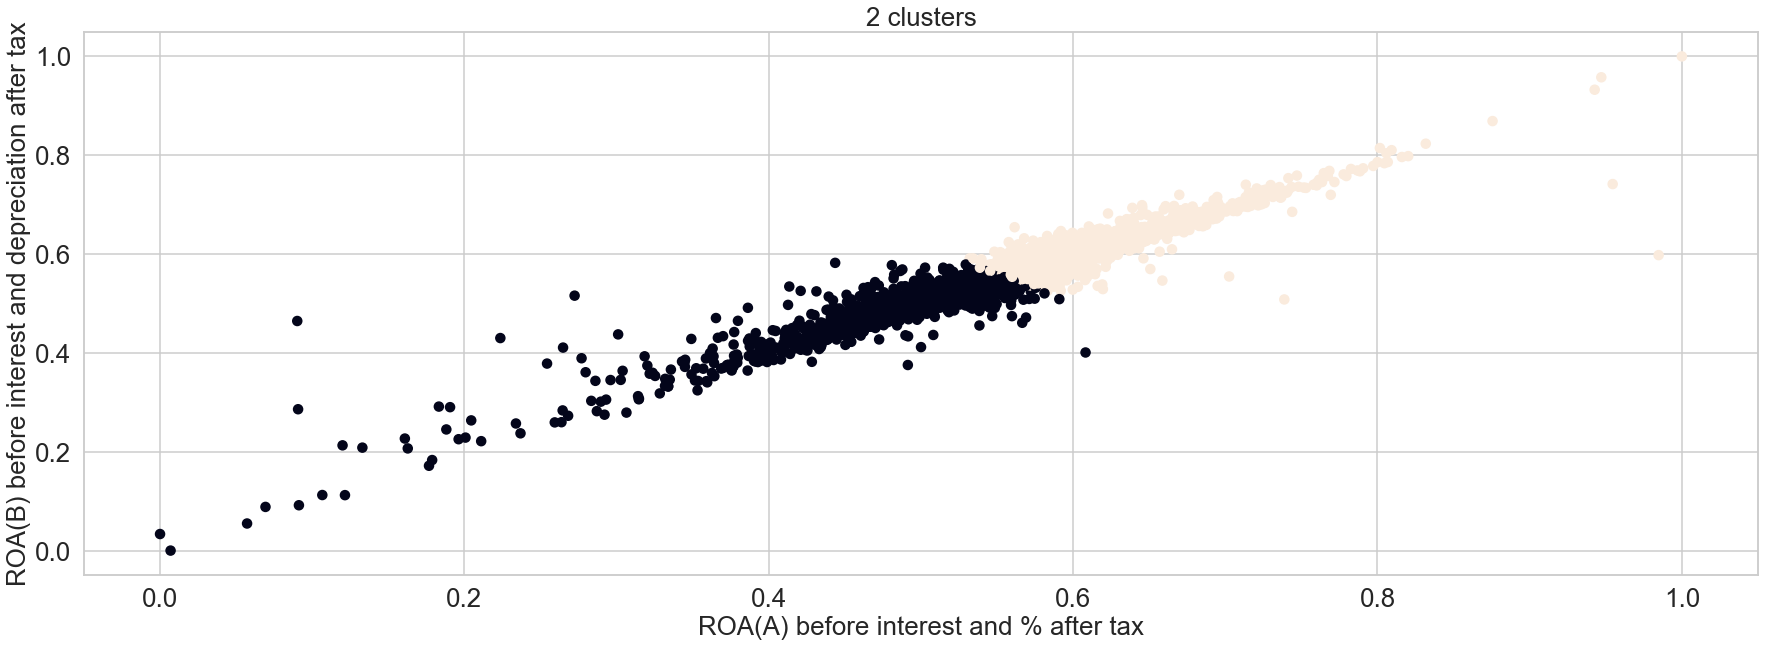

<Figure size 2160x720 with 0 Axes>

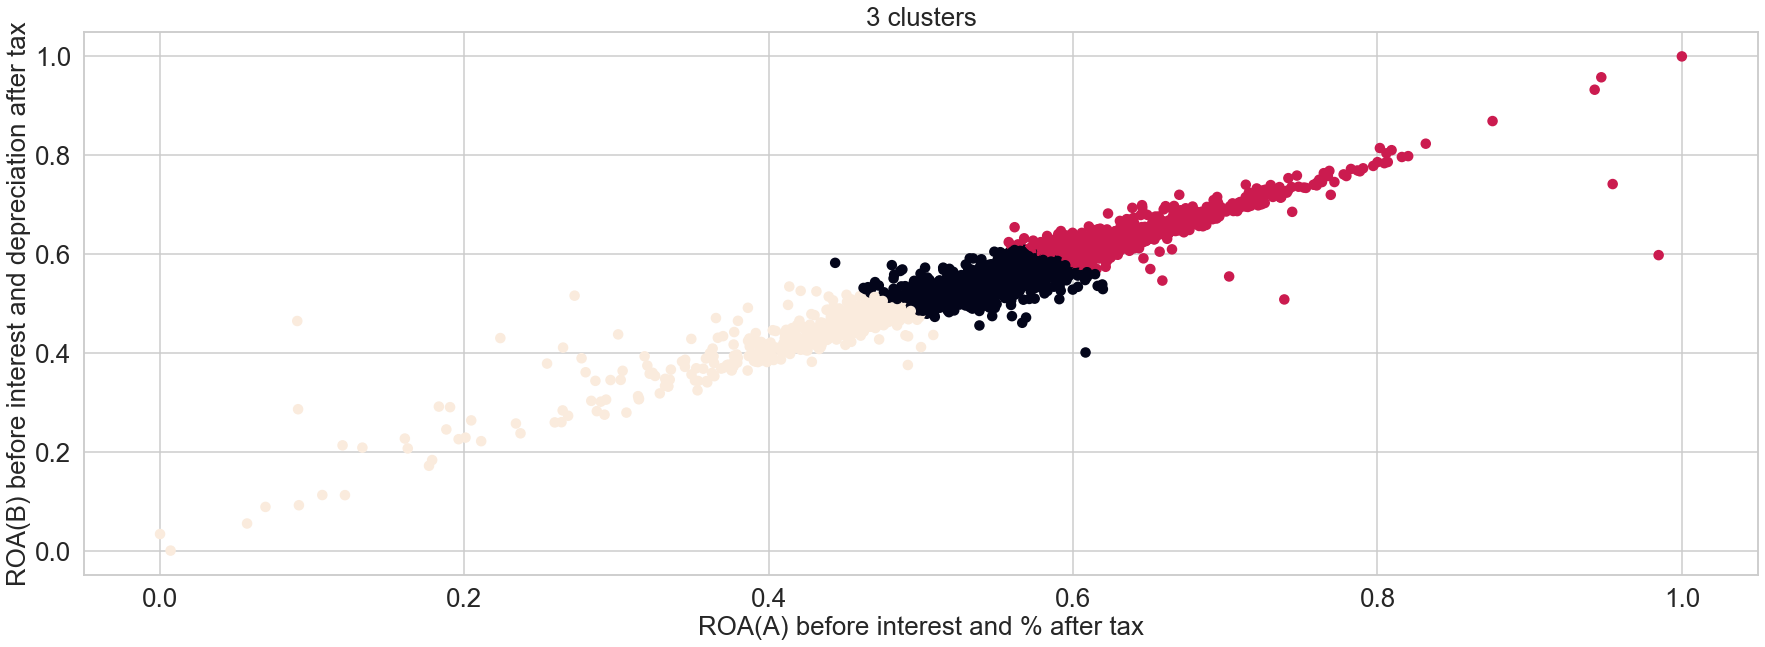

<Figure size 2160x720 with 0 Axes>

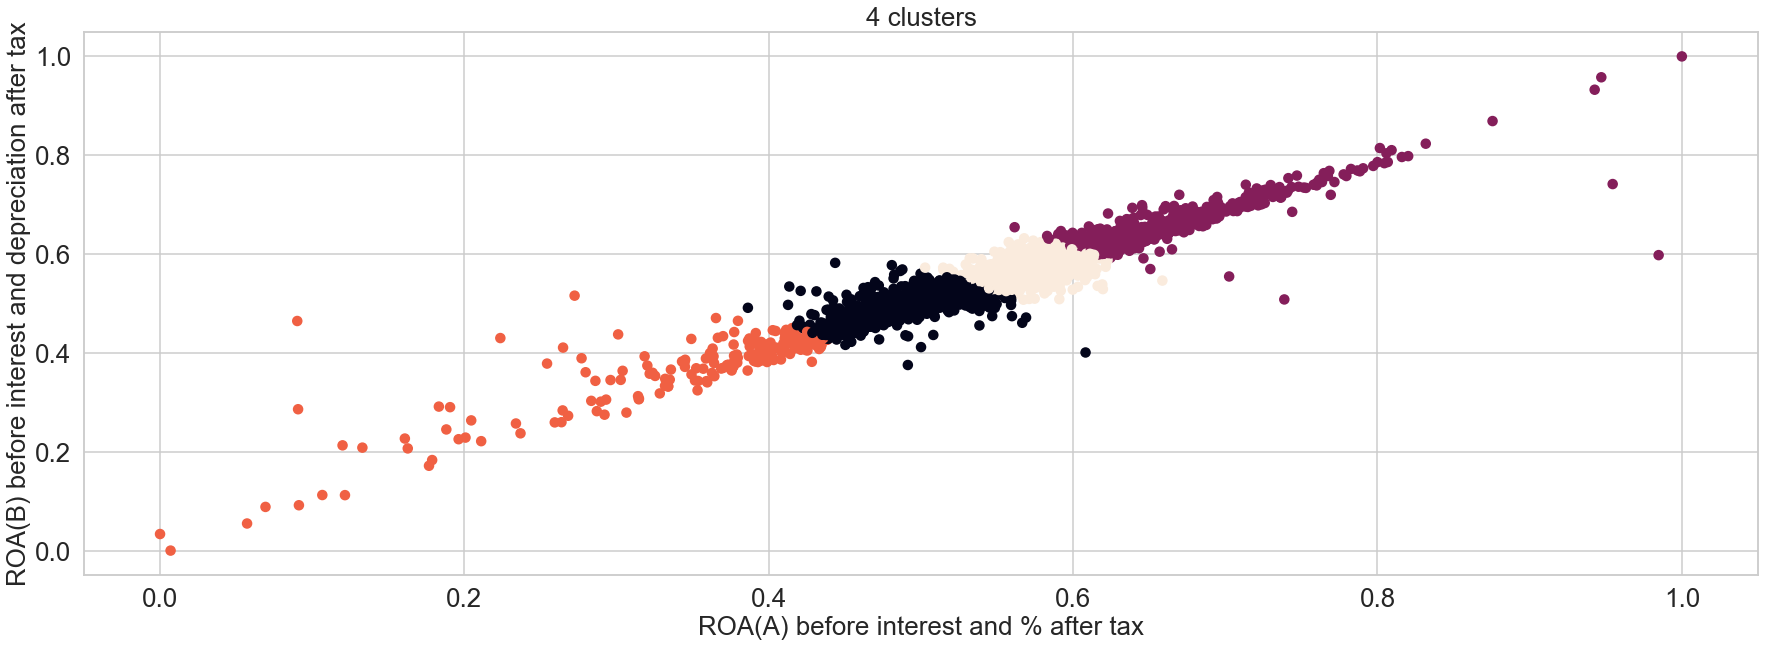

<Figure size 2160x720 with 0 Axes>

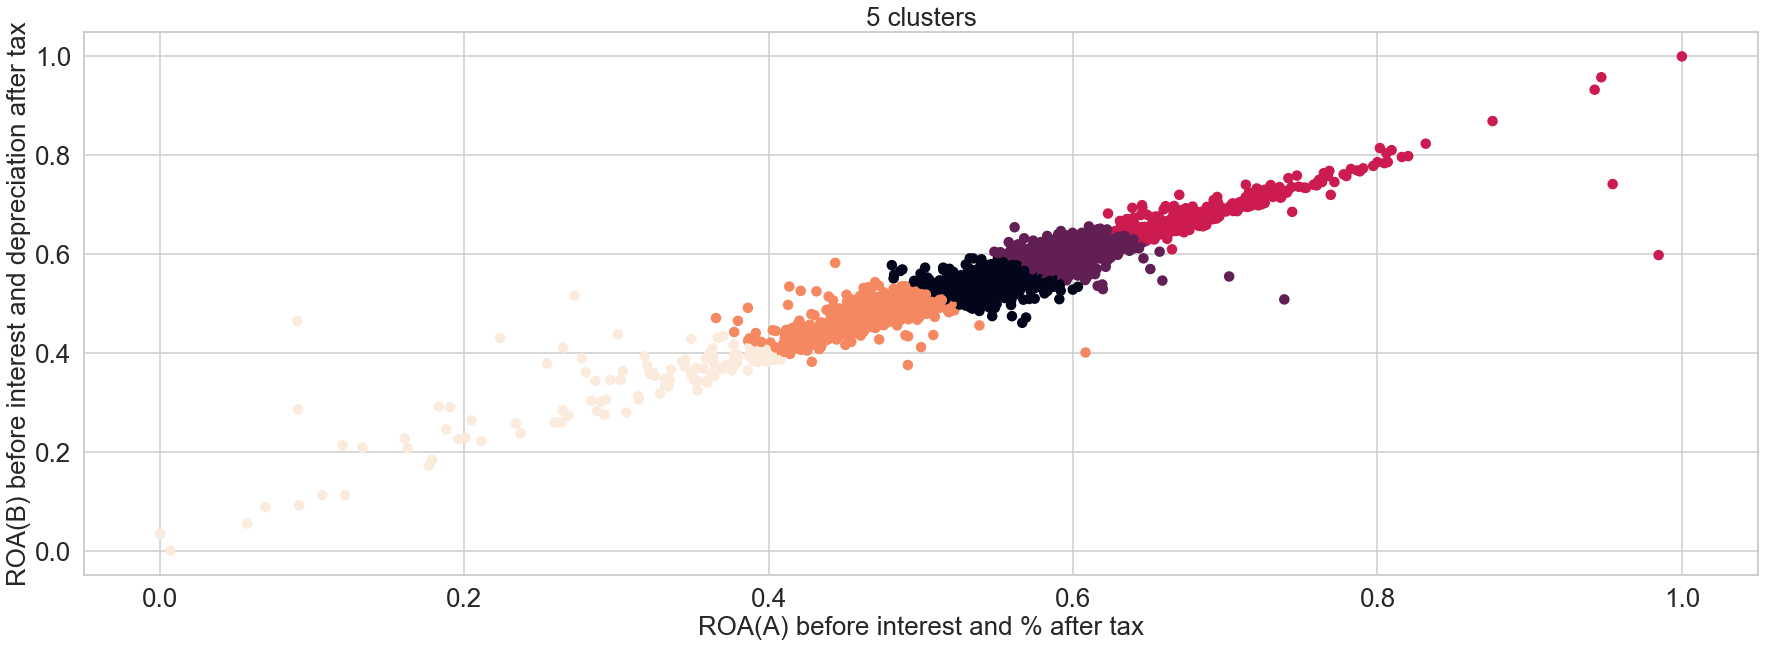

<Figure size 2160x720 with 0 Axes>

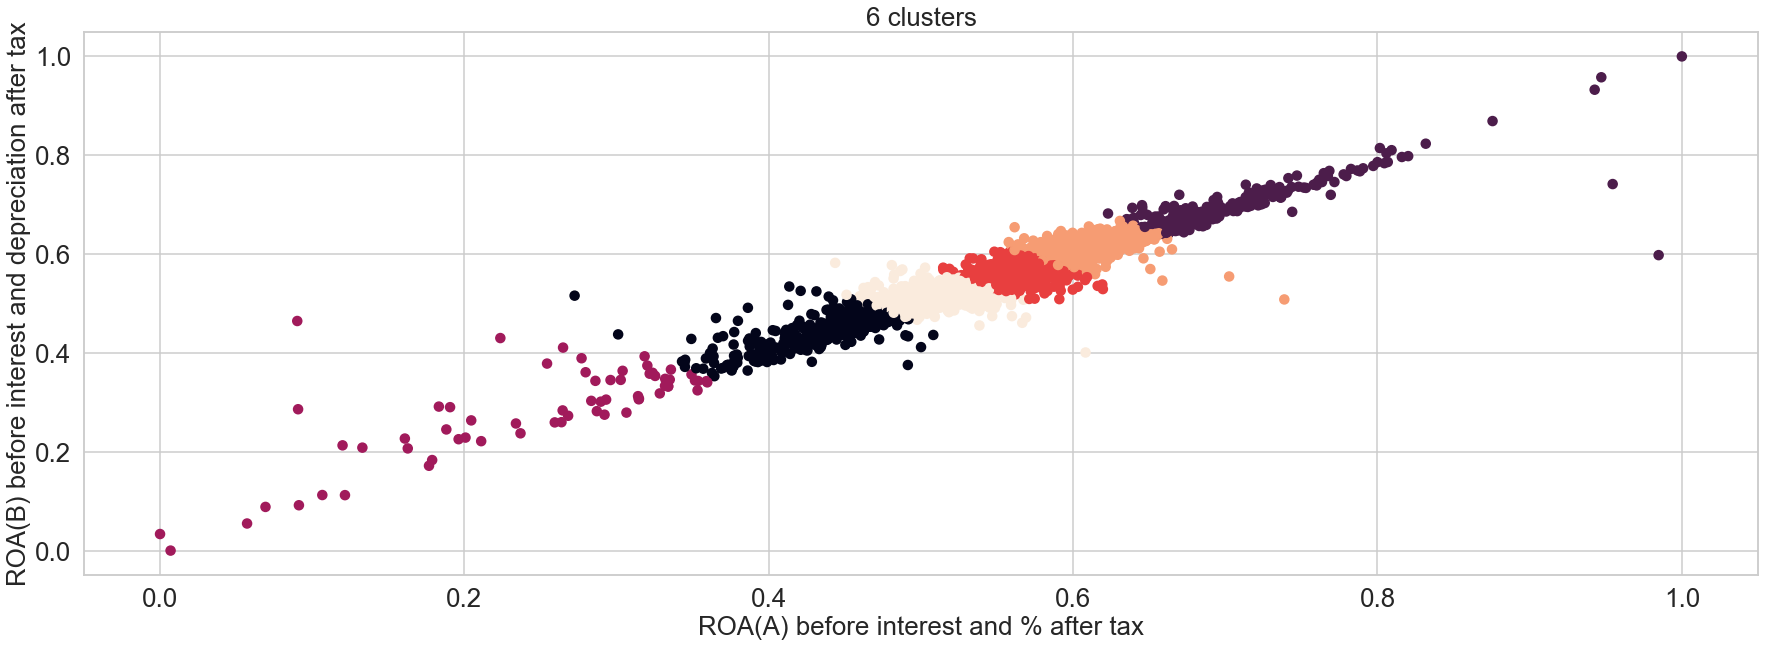

<Figure size 2160x720 with 0 Axes>

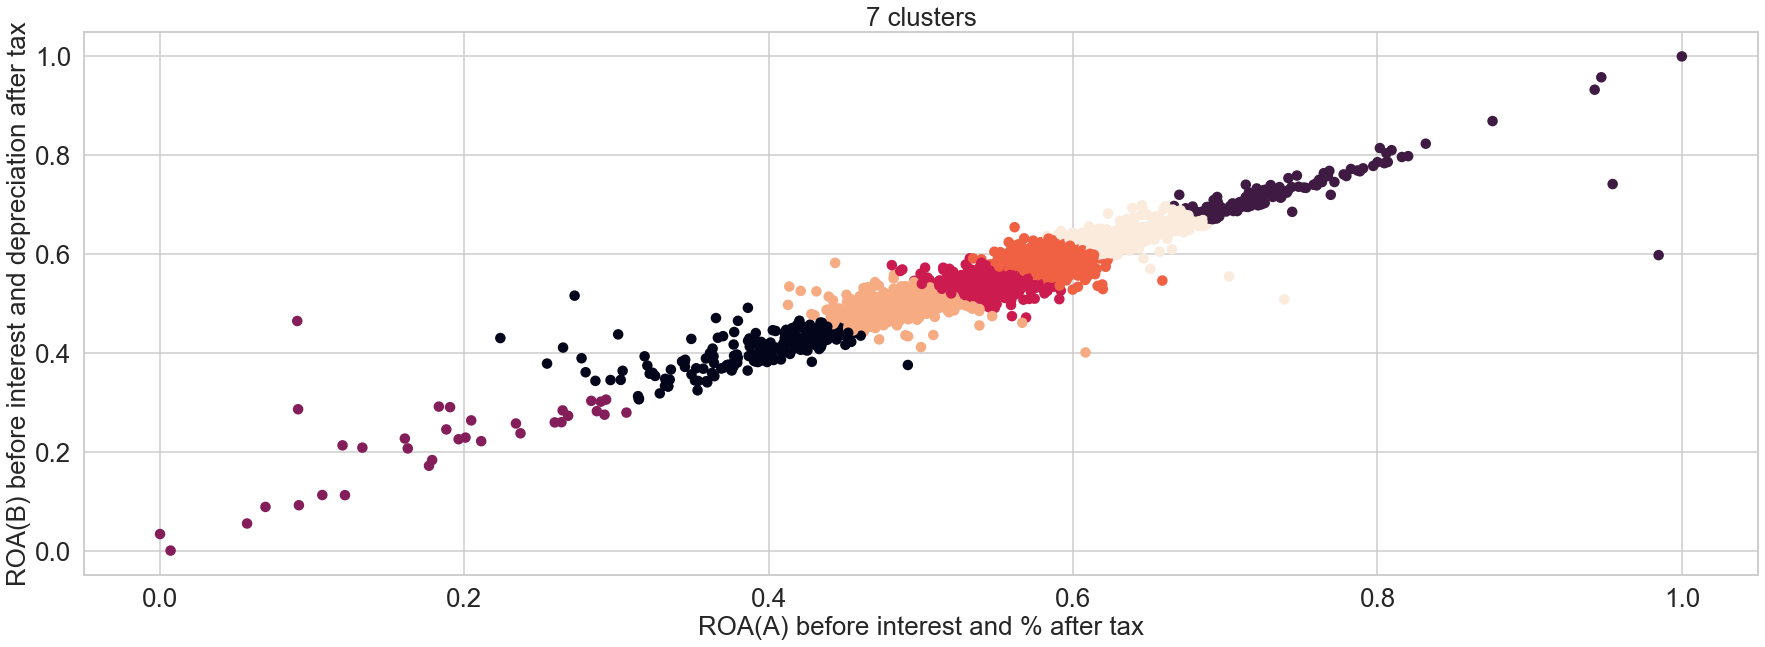

<Figure size 2160x720 with 0 Axes>

In [18]:
for c in range(1,8):
    km = KMeans(
    n_clusters=c, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
    )
    prediction = km.fit_predict(data)

    plt.scatter(bank_train.iloc[:,2],bank_train.iloc[:,3],c = prediction)
    plt.xlabel("ROA(A) before interest and % after tax")
    plt.ylabel("ROA(B) before interest and depreciation after tax")
    plt.title(f"{c} clusters")
    plt.figure()
    plt.show()

Going from 1 to 7 clusters, we can observe that each time we add a new cluster the previous cluster seems to be more precise

12. Find the optimum value of K. Use SciKit-Learn to alter the batch sizes for the K means algorithm.

In [19]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

for k in range(2, kmax+1):
    
    kmeans = KMeans(n_clusters = k).fit(data)
    labels = kmeans.labels_
    sil.append(silhouette_score(data, labels, metric = 'euclidean'))

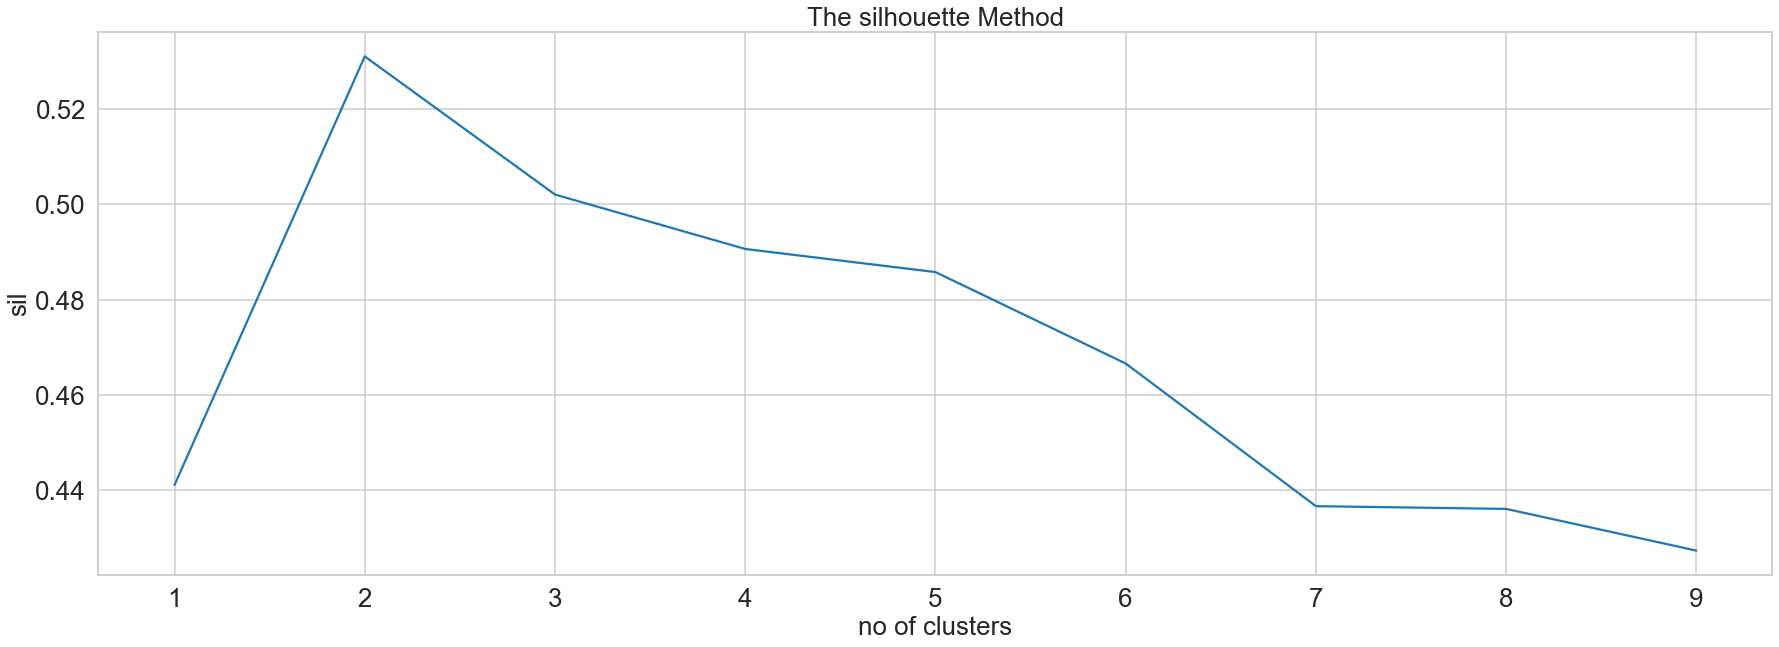

In [23]:
plt.plot(range(1,10), sil)
plt.title('The silhouette Method')
plt.xlabel('no of clusters')
plt.ylabel('sil')
plt.show()

After performing a Silhouette analysis to appropriately to find the most appropriate cluster, 2 seems to be the number of cluster that grants the highest silhouette score.

We will now train our model multiple time using different cluster sizes(1 to 10) and then visualize it in order to find the optimum number of clusters

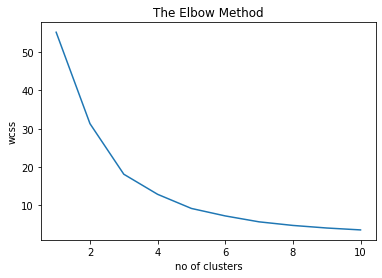

In [47]:
from sklearn.cluster import KMeans
wcss=[]


for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

Clearly, the more cluster we have the better our unsupervised algorithm performs, depending on the computational cost, the optimum number of cluster is somewhere between 8 and 10 . this is due to the point of diminishing return is no longer worth the additional computational cost, more than 10 cluster won't give us a much better modelling of the data, with another perspective, if we try to scale the size of our data, a process that happens often in real life situations specially when using online learning, if we use a high number of clusters the computational cost will raise exponentially, which can be detrimental to the  

Clustering method can be used in  pre processing of a data in the case of  semi-Supervised Learning. There are some cases where in you might not have any context or information about the data and relationships between the features whatsoever with a lot of missing labels or no labels at all.

We can apply the clustering first to find the natural segmentation of the data and then create labels. We can then use that pre-processed data to model a semi-supervised classification.

#### TensorFlow and Classification


We start by installing the lastest version of the necessary modules using pip  in the command prompt.

In [16]:
pip install tensorflow==2.9.0 --ignore-installed --user


ERROR: Could not find a version that satisfies the requirement user
ERROR: No matching distribution found for user


  Using cached tensorflow-2.9.0-cp38-cp38-win_amd64.whl (444.1 MB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\imade\\AppData\\Roaming\\Python\\Python38\\site-packages\\pyasn1_modules\\rfc6402.py'
Check the permissions.




  Using cached tensorflow-2.9.0-cp38-cp38-win_amd64.whl (444.1 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached libclang-14.0.1-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached setuptools-63.1.0-py3-none-any.whl (1.2 MB)
  Using cached absl_py-1.1.0-py3-none-any.whl (123 kB)
  Using cached grpcio-1.47.0-cp38-cp38-win_amd64.whl (3.6 MB)
  Using cached numpy-1.23.0-cp38-cp38-win_amd64.whl (14.7 MB)
  Using cached typing_extensions-4.3.0-py3-none-any.whl (25 kB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached wrapt-1.14.1-cp38-cp38-win_amd64.whl (35 kB)
  Using cached protobuf-4.21.2-cp38-cp38-win_amd64.whl (524 kB)
  Using cached keras-2.9.0-

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account al

  Using cached tensorflow-2.9.0-cp38-cp38-win_amd64.whl (444.1 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached setuptools-63.1.0-py3-none-any.whl (1.2 MB)
  Using cached h5py-3.7.0-cp38-cp38-win_amd64.whl (2.6 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached typing_extensions-4.3.0-py3-none-any.whl (25 kB)
  Using cached absl_py-1.1.0-py3-none-any.whl (123 kB)
  Using cached tensorboard-2.9.1-py3-none-any.whl (5.8 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached wrapt-1.14.1-cp38-cp38-win_amd64.whl (35 kB)
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Using cached numpy-1.23.0-cp38-cp38-win_amd64.whl (14.7 MB)
  Using cached grpcio-1.47.0-cp38-cp38-win_amd64.whl (3.6 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached packaging-21.3-py3-

We load the libraries

In [51]:
import tensorflow as tf
# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical 

We split the dataset into training and validation set

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_resampled,y_resampled,test_size=.2, random_state=2)

we scale the dataset

In [58]:
from sklearn.preprocessing import StandardScaler
# Feature scaling (standardized)
#preprocessing.StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

We check the shape ouf our split training sets.

In [59]:
print(X_train.shape); print(X_test.shape)

(10558, 29)
(2640, 29)


we standarize our target values and change their type to better suit our model

In [60]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

count_classes = y_test.shape[1]
print(count_classes)

2


We now use the information gathered to select the best hyperparameters for each layer of our model.

In [44]:
model = Sequential()
model.add(Dense(10000, activation='relu', input_dim=30))
model.add(Dense(1000, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

### Justification and documentation

- I choose the sequential constructor model as a neural architecture because our network consists of a linear stack of layers, the first layers is the input rectified linear unit activation function layers which specifies the activation function and the number of input dimensions, In our case we have 30 predictors that we selected in the preliminary steps of our technical notebook through a correlation matrix. We do the same process for the 2 next layers, those layers represent the hidden layers without input dimension and reduced number of predictors. The activation function used is RELU as specified earlier, I choose ReLU because it is the most proven activation function for nonlinear data distribution, which is the case for our dataset with so many predictor values even after reducing them. ReLU also has the ability to not activate all the neurons at the same time.

- The last layer is the output layer that will receive our target values, to train the model for classification, we have 2 output classes either a bank is bankrupt or not, we use soft max as the activation function for that layer, so that the predicted values for all neurons in the output layers adds up to one.
- In defining our compiler, we will use 'categorical cross-entropy' as our loss measure, 'adam' as the optimizer algorithm, and 'accuracy' as the evaluation metric. The main advantage of the "adam" optimizer is that we don't need to specify the learning rate, as is the case with gradient descent. Using “adam” will, thereby, save us the task of optimizing the learning rate for our model.


###### Output of our model

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10000)             310000    
                                                                 
 dense_5 (Dense)             (None, 1000)              10001000  
                                                                 
 dense_6 (Dense)             (None, 500)               500500    
                                                                 
 dense_7 (Dense)             (None, 2)                 1002      
                                                                 
Total params: 10,812,502
Trainable params: 10,812,502
Non-trainable params: 0
_________________________________________________________________


We have quite a lot of parameter this will make the training costly in term of computational resources, but the preliminary processing and parameters selection will optimize the training of the model in the next step.

16. Using Keras and TensorFlow, train and evaluate your neural network model. Plot how
the testing and validation errors change with the number of training epochs. Make
predictions.

now we can train our model

In [69]:
# build the model
model.fit(X_train, y_train, epochs =20)

Epoch 1/20
330/330 [==============================] - 22s 64ms/step - loss: 23071608.0000 - accuracy: 0.7358
Epoch 2/20
330/330 [==============================] - 25s 76ms/step - loss: 3809070.0000 - accuracy: 0.7487
Epoch 3/20
330/330 [==============================] - 24s 74ms/step - loss: 795970.3750 - accuracy: 0.7492
Epoch 4/20
330/330 [==============================] - 20s 62ms/step - loss: 436916.0938 - accuracy: 0.7591
Epoch 5/20
330/330 [==============================] - 23s 71ms/step - loss: 499202.1875 - accuracy: 0.7525
Epoch 6/20
330/330 [==============================] - 21s 62ms/step - loss: 119652.2266 - accuracy: 0.7533
Epoch 7/20
330/330 [==============================] - 21s 65ms/step - loss: 18314.1758 - accuracy: 0.7549
Epoch 8/20
330/330 [==============================] - 25s 77ms/step - loss: 0.3913 - accuracy: 0.7557
Epoch 9/20
330/330 [==============================] - 27s 83ms/step - loss: 0.3914 - accuracy: 0.7557
Epoch 10/20
330/330 [========================

From this we can safely conculde that the optimal value for the number training iterations is 8, anything more will just be a computational ressource waste, we will reduce the number of epoch accordingly, increase the batch size and store the history of the training of the model in otder to plot those data.

In [47]:
history = model.fit(X_train, y_train, epochs =8,validation_split = 0.1, batch_size=4)

Epoch 1/8
2376/2376 [==============================] - 133s 56ms/step - loss: 9654078.0000 - accuracy: 0.7329 - val_loss: 1232921.6250 - val_accuracy: 0.7585
Epoch 2/8
2376/2376 [==============================] - 136s 57ms/step - loss: 281341.2500 - accuracy: 0.7485 - val_loss: 4141141.7500 - val_accuracy: 0.7576
Epoch 3/8
2376/2376 [==============================] - 155s 65ms/step - loss: 865662.0625 - accuracy: 0.7482 - val_loss: 0.3875 - val_accuracy: 0.7585
Epoch 4/8
2376/2376 [==============================] - 139s 58ms/step - loss: 0.4024 - accuracy: 0.7489 - val_loss: 0.3875 - val_accuracy: 0.7585
Epoch 5/8
2376/2376 [==============================] - 143s 60ms/step - loss: 0.4024 - accuracy: 0.7489 - val_loss: 0.3890 - val_accuracy: 0.7585
Epoch 6/8
2376/2376 [==============================] - 142s 60ms/step - loss: 0.4026 - accuracy: 0.7489 - val_loss: 0.3876 - val_accuracy: 0.7585
Epoch 7/8
2376/2376 [==============================] - 162s 68ms/step - loss: 0.4025 - accuracy:

##### Final accuracy of the model

In [71]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

330/330 [==============================] - 5s 14ms/step
Accuracy on training data: 0.7557302713394165% 
 Error on training data: 0.2442697286605835
83/83 [==============================] - 1s 13ms/step
Accuracy on test data: 0.7503787875175476% 
 Error on test data: 0.2496212124824524


#### Plotting the accuracy data compared to the number of epochs in the training and validation splits

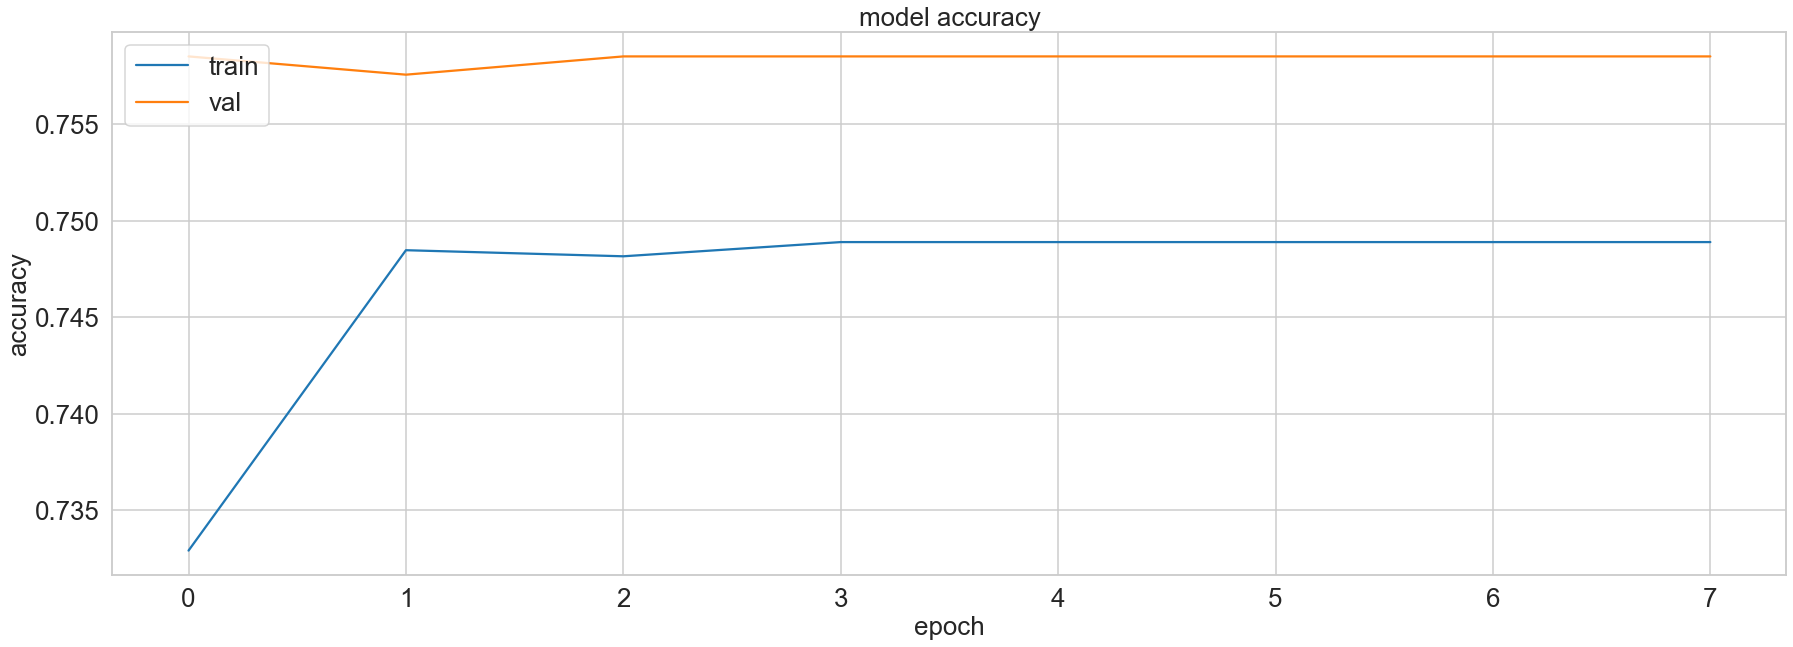

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### Plotting the error to the number of epochs in the training and validation splits


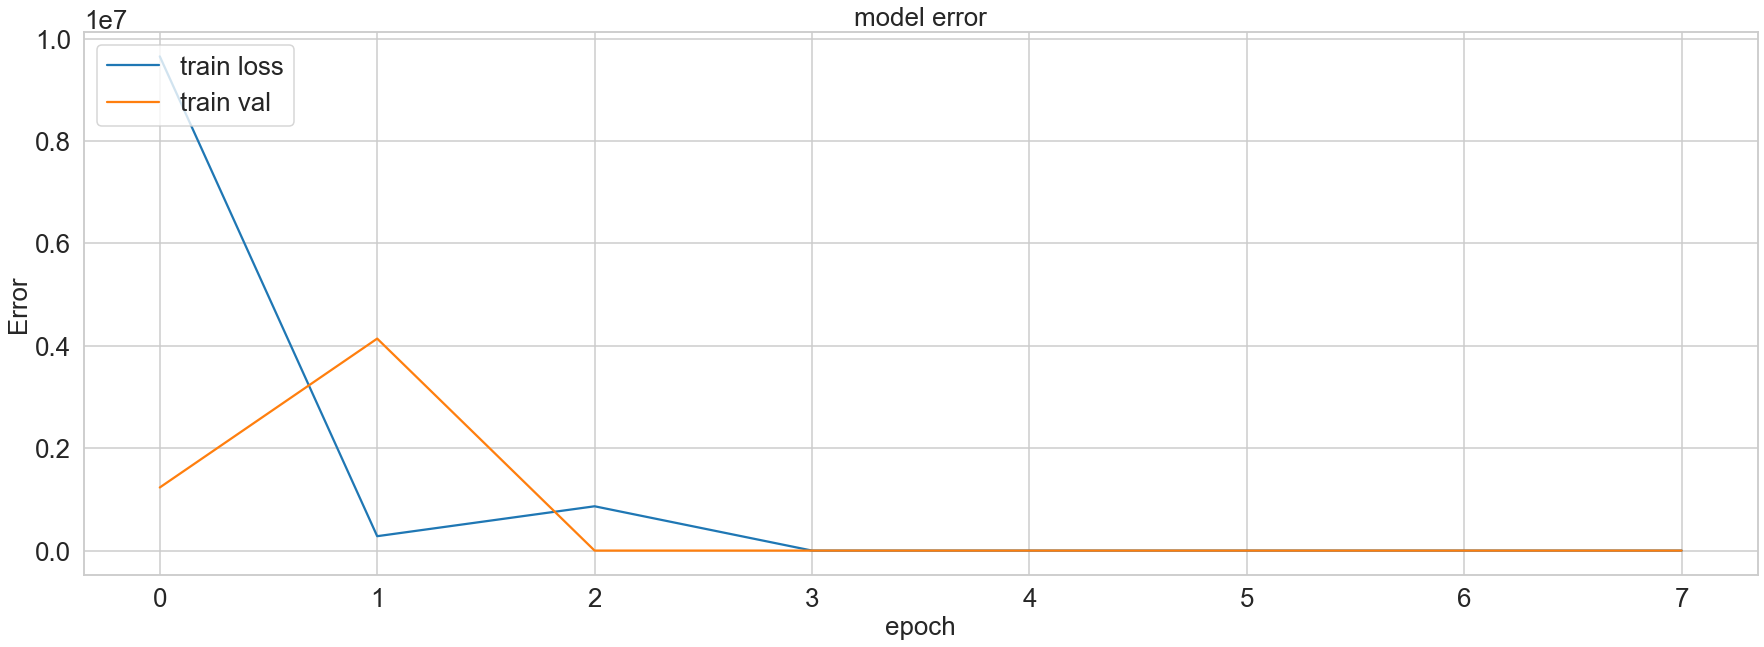

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model error')
plt.ylabel('Error')
plt.xlabel('epoch')
plt.legend(['train loss', 'train val'], loc='upper left')
plt.show()

The optimal number of epochs for the highest accuracy seems to only be 1 as the model stagnate after that, but it does give us better accuracy in the validation set, as far as errors are concerned 3 epochs is where the error goes to NULL.

#### Deep Neural Networks

A neural network is a model that implements a series of algorithms which endeavours is to recognize underlying relationships in a set of data, that process mimic the way the human brain works. Typically, a neural network is constituted of layers and each layers has a number of neurons, the width in this case refers to the number of neurons per layer, and the depth refers to the number of layers a model has, the more depth we have the better a model is able to generalize and the more width a model have the more it is able to memorize, Wide and Deep jointly trains wide linear models and deep neural networks to combine the benefits of memorization and generalization. In other words, the wide component is a generalized linear model. The deep component is a neural network. The deep and wide components are combined using a weighted sum of their output log odds as the prediction. This is then fed to a logistic loss function for joint training, which is done by back-propagating the gradients from the output to both the wide and deep part of the model simultaneously using mini-batch stochastic optimization, These types of networks can be useful in complex datasets and problems where finding high accuracy with small models is difficult. These are typically used in computer vision and NLP problems.

18. Experiment with the number of Hidden layers in your neural network. Using SciKitLearn. Experiment with the number of neurons per hidden layer. Experiment with the
number of training epochs, and also the training rate. Document your results.

We suspect that our previous model had too many layers, and too much neurons as the accuracy stagnated after a couple of epoch, we will now build a model with less neurons and only one layer for the features and another one for the target values we will use sigmoid for this task. 

In [92]:
from tensorflow.keras import layers
from tensorflow.keras import activations
model = Sequential()
model.add(Dense(128,activation='relu', input_dim=30))
model.add(Dense(56, activation='relu'))

model.add(Dense(1,activation = "sigmoid"))
model.compile(loss="binary_crossentropy" , optimizer="adam", metrics=["binary_accuracy"])

In [97]:
history= model.fit(x_train, y_train, epochs = 50, validation_split = 0.1, batch_size=4)

Epoch 1/50
2376/2376 [==============================] - 7s 3ms/step - loss: 90.3040 - binary_accuracy: 0.7209 - val_loss: 0.4679 - val_binary_accuracy: 0.7263
Epoch 2/50
2376/2376 [==============================] - 6s 2ms/step - loss: 0.4753 - binary_accuracy: 0.7205 - val_loss: 0.4799 - val_binary_accuracy: 0.7150
Epoch 3/50
2376/2376 [==============================] - 8s 3ms/step - loss: 18447.6172 - binary_accuracy: 0.7222 - val_loss: 0.4523 - val_binary_accuracy: 0.7405
Epoch 4/50
2376/2376 [==============================] - 6s 2ms/step - loss: 2026.0920 - binary_accuracy: 0.7208 - val_loss: 0.4785 - val_binary_accuracy: 0.7235
Epoch 5/50
2376/2376 [==============================] - 6s 2ms/step - loss: 0.4786 - binary_accuracy: 0.7185 - val_loss: 0.4565 - val_binary_accuracy: 0.7348
Epoch 6/50
2376/2376 [==============================] - 8s 3ms/step - loss: 344614.9062 - binary_accuracy: 0.7178 - val_loss: 0.4566 - val_binary_accuracy: 0.7330
Epoch 7/50
2376/2376 [=================

In [99]:
history.history

{'loss': [90.30402374267578,
  0.4753071069717407,
  18447.6171875,
  2026.092041015625,
  0.4786221981048584,
  344614.90625,
  19.144445419311523,
  1133.56396484375,
  0.47488266229629517,
  0.47300243377685547,
  1726.15869140625,
  0.4693022668361664,
  0.4689409136772156,
  0.4682116210460663,
  1130.093017578125,
  0.4681219458580017,
  0.46674975752830505,
  0.46529150009155273,
  3387.70654296875,
  0.4634946882724762,
  90.0406494140625,
  0.4622960090637207,
  0.4615059494972229,
  43872.46484375,
  0.46167880296707153,
  16715.61328125,
  0.4602060914039612,
  21768.59765625,
  0.46184390783309937,
  0.4579020142555237,
  0.4581572413444519,
  1854.859619140625,
  6801.91455078125,
  0.45639610290527344,
  6995.15966796875,
  196.55752563476562,
  0.4544573724269867,
  22.931909561157227,
  0.4528883695602417,
  0.453878790140152,
  2525.187255859375,
  0.4512793719768524,
  7288.96923828125,
  0.45173799991607666,
  0.4502171576023102,
  0.4508955180644989,
  0.44987639784

As I expected the model is actually making progress here, my initial neural network had too many layers and unbalanced neurons number

#### Plotting the accuracy data compared to the number of epochs in the training and validation splits


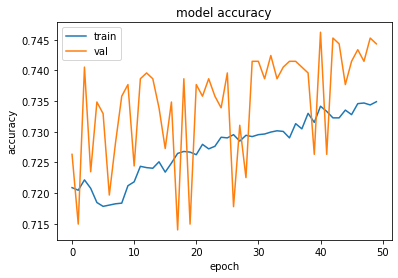

In [101]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [81]:
model = Sequential()


model.add(Dense(1000, activation='relu', input_dim=30,kernel_initializer="he_normal"))
model.add(Dense(100, activation='relu', kernel_initializer="he_normal"))
model.add(Dense(1, activation='softmax', kernel_initializer = "glorot_uniform"))

# Compile the model
model.compile(optimizer='nadam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [82]:
history_He = model.fit(x_train, y_train, epochs =8, batch_size=4)

Epoch 1/8
2640/2640 [==============================] - 14s 5ms/step - loss: 0.0000e+00 - accuracy: 0.5024
Epoch 2/8
2640/2640 [==============================] - 10s 4ms/step - loss: 0.0000e+00 - accuracy: 0.5024
Epoch 3/8
2640/2640 [==============================] - 10s 4ms/step - loss: 0.0000e+00 - accuracy: 0.5024
Epoch 4/8
2640/2640 [==============================] - 9s 3ms/step - loss: 0.0000e+00 - accuracy: 0.5024
Epoch 5/8
2640/2640 [==============================] - 9s 3ms/step - loss: 0.0000e+00 - accuracy: 0.5024
Epoch 6/8
2640/2640 [==============================] - 9s 3ms/step - loss: 0.0000e+00 - accuracy: 0.5024
Epoch 7/8
2640/2640 [==============================] - 9s 4ms/step - loss: 0.0000e+00 - accuracy: 0.5024
Epoch 8/8
2640/2640 [==============================] - 9s 4ms/step - loss: 0.0000e+00 - accuracy: 0.5024


The model is not performing well using Gloriot and He on this dataset. This is potentially due that our dataset doesn't require a deep feedforward neural network, since glorot and he algorithm solve the issues that come with that type of models when trying to train them, by a combination of sigmoid activation and the weight initialization technique, but as seen in previous examples in the notebook our model was doing fine with only a limited number of layers.